In [413]:
import pandas as pd
import functions as func
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [415]:
from functions import clean_data, feature_engineering, split_data, train_model, evaluate_model, plot_predictions

In [417]:
import os
print(os.getcwd()) 

/Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Week9/Iron_Hack_Water_in_Tunisia/notebooks


In [419]:
def clean_data(df):
    """
    Clean the input dataset by filling missing values only for numeric columns.
    Non-numeric columns are left as they are.
    """
    # Fill missing values for numeric columns with the mean
    df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
    df_non_numeric = df.select_dtypes(exclude=[np.number])  # Non-numeric columns
    
    df_numeric_cleaned = df_numeric.fillna(df_numeric.mean())  # Fill missing numeric values with the mean
    
    # Combine the numeric and non-numeric data back together
    df_cleaned = pd.concat([df_numeric_cleaned, df_non_numeric], axis=1)
    
    return df_cleaned


In [421]:
# Define the paths to your data files
tunis_dams_rain_data_path = '../data/raw/tunis_dams_rain_mehdi.csv'
weather_data_path = '../data/raw/weather.csv'

# Load the files
tunis_dams_rain_data = pd.read_csv(tunis_dams_rain_data_path)
weather_data = pd.read_csv(weather_data_path)

# Clean each dataset using the clean_data function
tunis_dams_rain_cleaned = clean_data(tunis_dams_rain_data)
weather_cleaned = clean_data(weather_data)

# Display the cleaned data to verify
display(tunis_dams_rain_cleaned.head())
display(weather_cleaned.head())

# Optional: Save the cleaned data to the clean folder
tunis_dams_rain_cleaned.to_csv('../data/clean/tunis_dams_rain_cleaned.csv', index=False)
weather_cleaned.to_csv('../data/clean/weather_cleaned.csv', index=False)


,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,S. EL BARRAK,...,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine,date
0,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,273.385,...,2.4,3.255,0.293,2.822,9.820,1.604,4.608,17.386471,24.297374,2014-01-08
1,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,264.751,...,2.4,2.201,0.134,1.549,8.170,1.491,3.558,17.386471,24.297374,2014-01-09
2,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,259.239,...,2.4,1.590,0.140,0.924,7.100,1.413,2.789,17.386471,24.297374,2014-01-10
3,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,255.256,...,2.4,0.998,1.116,1.882,12.562,1.209,4.705,17.386471,24.297374,2014-01-12
4,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,273.234,...,2.4,3.215,0.285,2.770,9.735,1.599,4.584,17.386471,24.297374,2014-02-08


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,date
0,6.8,1.300000,14.700000,0.0000,NaN,273.000000,19.300000,NaN,1016.178487,NaN,2014-01-01
1,7.5,13.759926,14.400000,0.4108,NaN,147.866142,16.403548,NaN,1016.178487,NaN,2014-01-02
2,10.4,13.759926,25.855248,0.0000,NaN,147.866142,16.403548,NaN,1016.178487,NaN,2014-01-03
3,10.6,3.500000,18.800000,0.0000,NaN,197.000000,9.500000,NaN,1016.178487,NaN,2014-01-04
4,11.7,8.900000,20.000000,0.0000,NaN,147.866142,9.200000,NaN,1016.178487,NaN,2014-01-05


In [423]:
# Load the files
tunis_dams_rain_data = pd.read_csv(tunis_dams_rain_data_path)
weather_data = pd.read_csv(weather_data_path)

# Clean each dataset using the clean_data function
tunis_dams_rain_cleaned = clean_data(tunis_dams_rain_data)
weather_cleaned = clean_data(weather_data)

# Display the cleaned data to verify
display(tunis_dams_rain_cleaned.head())
display(weather_cleaned.head())

# Optional: Save the cleaned data to the clean folder
tunis_dams_rain_cleaned.to_csv('../data/clean/tunis_dams_rain_cleaned.csv', index=False)
weather_cleaned.to_csv('../data/clean/weather_cleaned.csv', index=False)


,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,S. EL BARRAK,...,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine,date
0,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,273.385,...,2.4,3.255,0.293,2.822,9.820,1.604,4.608,17.386471,24.297374,2014-01-08
1,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,264.751,...,2.4,2.201,0.134,1.549,8.170,1.491,3.558,17.386471,24.297374,2014-01-09
2,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,259.239,...,2.4,1.590,0.140,0.924,7.100,1.413,2.789,17.386471,24.297374,2014-01-10
3,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,255.256,...,2.4,0.998,1.116,1.882,12.562,1.209,4.705,17.386471,24.297374,2014-01-12
4,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,273.234,...,2.4,3.215,0.285,2.770,9.735,1.599,4.584,17.386471,24.297374,2014-02-08


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,date
0,6.8,1.300000,14.700000,0.0000,NaN,273.000000,19.300000,NaN,1016.178487,NaN,2014-01-01
1,7.5,13.759926,14.400000,0.4108,NaN,147.866142,16.403548,NaN,1016.178487,NaN,2014-01-02
2,10.4,13.759926,25.855248,0.0000,NaN,147.866142,16.403548,NaN,1016.178487,NaN,2014-01-03
3,10.6,3.500000,18.800000,0.0000,NaN,197.000000,9.500000,NaN,1016.178487,NaN,2014-01-04
4,11.7,8.900000,20.000000,0.0000,NaN,147.866142,9.200000,NaN,1016.178487,NaN,2014-01-05


# Data Understanding



In [428]:
import pandas as pd
from IPython.display import display

# Paths to your two data files
tunis_dams_rain_data_path = '../data/raw/tunis_dams_rain_mehdi.csv'
weather_data_path = '../data/raw/weather.csv'

# Load the files
tunis_dams_rain_data = pd.read_csv(tunis_dams_rain_data_path)
weather_data = pd.read_csv(weather_data_path)

# Display a preview of each dataset
display(tunis_dams_rain_data.head())
display(weather_data.head())


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [430]:
# Step 2: Check for missing values
print("Checking for missing values in tunis_dams_rain_data:")
print(tunis_dams_rain_data.isnull().sum())

print("\nChecking for missing values in weather_data:")
print(weather_data.isnull().sum())


Checking for missing values in tunis_dams_rain_data:
date              0
MELLEGUE          0
BEN METIR         0
KASSEB            0
BARBARA           0
SIDI SALEM        0
BOU-HEURTMA       0
JOUMINE           0
GHEZALA           0
SEJNANE           0
S. EL BARRAK      0
SILIANA           0
LAKHMESS          0
RMIL              0
BIR M'CHERGA      0
RMEL              0
NEBHANA           0
SIDI SAAD         0
EL HAOUAREB       0
SIDI AÏCH         0
EL BREK           0
BEZIRK            0
CHIBA             0
MASRI             0
LEBNA             0
HMA               4
ABID              4
Zarga           755
Ziatine         755
dtype: int64

Checking for missing values in weather_data:
date       0
tavg       0
tmin      94
tmax      63
prcp     154
snow    1978
wdir     581
wspd     315
wpgt    1978
pres     960
tsun    1978
dtype: int64


In [432]:
# Step 3: Remove duplicates

# Remove duplicates in tunis_dams_rain_data
tunis_dams_rain_data_cleaned = tunis_dams_rain_data.drop_duplicates()

# Remove duplicates in weather_data
weather_data_cleaned = weather_data.drop_duplicates()

# Display the results to confirm duplicates have been removed
print("tunis_dams_rain_data after removing duplicates:")
display(tunis_dams_rain_data_cleaned.head())

print("\nweather_data after removing duplicates:")
display(weather_data_cleaned.head())


tunis_dams_rain_data after removing duplicates:


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN



weather_data after removing duplicates:


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [434]:
# Step 4: Check data types

# Check data types in tunis_dams_rain_data
print("Data types in tunis_dams_rain_data:")
print(tunis_dams_rain_data_cleaned.dtypes)

# Check data types in weather_data
print("\nData types in weather_data:")
print(weather_data_cleaned.dtypes)


Data types in tunis_dams_rain_data:
date             object
MELLEGUE        float64
BEN METIR       float64
KASSEB          float64
BARBARA         float64
SIDI SALEM      float64
BOU-HEURTMA     float64
JOUMINE         float64
GHEZALA         float64
SEJNANE         float64
S. EL BARRAK    float64
SILIANA         float64
LAKHMESS        float64
RMIL            float64
BIR M'CHERGA    float64
RMEL            float64
NEBHANA         float64
SIDI SAAD       float64
EL HAOUAREB     float64
SIDI AÏCH       float64
EL BREK         float64
BEZIRK          float64
CHIBA           float64
MASRI           float64
LEBNA           float64
HMA             float64
ABID            float64
Zarga           float64
Ziatine         float64
dtype: object

Data types in weather_data:
date     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object


In [436]:
from functions import clean_data


In [438]:
display(tunis_dams_rain_data_cleaned.head())


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN


In [442]:
# Step 5: Preview cleaned datasets

# Preview the cleaned tunis_dams_rain_data
print("Preview of cleaned tunis_dams_rain_data:")
display(tunis_dams_rain_data_cleaned.head())

# Preview the cleaned weather_data
print("\nPreview of cleaned weather_data:")
display(weather_data_cleaned.head())


Preview of cleaned tunis_dams_rain_data:


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN



Preview of cleaned weather_data:


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [444]:
# Feature Engineering

# If 'date' exists in tunis_dams_rain_data, extract year, month, and day
if 'date' in tunis_dams_rain_data_cleaned.columns:
    tunis_dams_rain_data_cleaned['Year'] = pd.DatetimeIndex(tunis_dams_rain_data_cleaned['date']).year
    tunis_dams_rain_data_cleaned['Month'] = pd.DatetimeIndex(tunis_dams_rain_data_cleaned['date']).month
    tunis_dams_rain_data_cleaned['Day'] = pd.DatetimeIndex(tunis_dams_rain_data_cleaned['date']).day

# If 'date' exists in weather_data, extract year, month, and day
if 'date' in weather_data_cleaned.columns:
    weather_data_cleaned['Year'] = pd.DatetimeIndex(weather_data_cleaned['date']).year
    weather_data_cleaned['Month'] = pd.DatetimeIndex(weather_data_cleaned['date']).month
    weather_data_cleaned['Day'] = pd.DatetimeIndex(weather_data_cleaned['date']).day

# Example feature: Cumulative rainfall from tunis_dams_rain_data
if 'rainfall' in tunis_dams_rain_data_cleaned.columns:
    tunis_dams_rain_data_cleaned['Cumulative_Rainfall'] = tunis_dams_rain_data_cleaned['rainfall'].cumsum()

# Example feature: Daily temperature change in weather_data
if 'temperature' in weather_data_cleaned.columns:
    weather_data_cleaned['Temperature_Change'] = weather_data_cleaned['temperature'].diff()

# Display the updated datasets to verify the new features
print("Updated tunis_dams_rain_data with new features:")
display(tunis_dams_rain_data_cleaned.head())

print("\nUpdated weather_data with new features:")
display(weather_data_cleaned.head())


Updated tunis_dams_rain_data with new features:


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine,Year,Month,Day
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.293,2.822,9.820,1.604,4.608,NaN,NaN,2014,1,8
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.134,1.549,8.170,1.491,3.558,NaN,NaN,2014,1,9
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.140,0.924,7.100,1.413,2.789,NaN,NaN,2014,1,10
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,1.116,1.882,12.562,1.209,4.705,NaN,NaN,2014,1,12
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.285,2.770,9.735,1.599,4.584,NaN,NaN,2014,2,8



Updated weather_data with new features:


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Year,Month,Day
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN,2014,1,1
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1,2
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2014,1,3
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN,2014,1,4
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN,2014,1,5


In [446]:
#Date extraction: We extract the year, month, and day from the date column, if present.
#Cumulative calculations: We compute cumulative rainfall.
#Difference calculations: We calculate daily temperature change.

In [448]:
# Step: Fill NaN values with 0

# Fill all NaN values in tunis_dams_rain_data with 0
tunis_dams_rain_data_cleaned = tunis_dams_rain_data_cleaned.fillna(0)

# Fill all NaN values in weather_data with 0
weather_data_cleaned = weather_data_cleaned.fillna(0)

# Display the datasets after handling NaN values
print("tunis_dams_rain_data after handling NaN values (filled with 0):")
display(tunis_dams_rain_data_cleaned.head())

print("\nweather_data after handling NaN values (filled with 0):")
display(weather_data_cleaned.head())


tunis_dams_rain_data after handling NaN values (filled with 0):


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine,Year,Month,Day
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.293,2.822,9.820,1.604,4.608,0.0,0.0,2014,1,8
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.134,1.549,8.170,1.491,3.558,0.0,0.0,2014,1,9
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.140,0.924,7.100,1.413,2.789,0.0,0.0,2014,1,10
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,1.116,1.882,12.562,1.209,4.705,0.0,0.0,2014,1,12
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.285,2.770,9.735,1.599,4.584,0.0,0.0,2014,2,8



weather_data after handling NaN values (filled with 0):


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Year,Month,Day
0,2014-01-01,6.8,1.3,14.7,0.0,0.0,273.0,19.3,0.0,0.0,0.0,2014,1,1
1,2014-01-02,7.5,0.0,14.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,1,2
2,2014-01-03,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,1,3
3,2014-01-04,10.6,3.5,18.8,0.0,0.0,197.0,9.5,0.0,0.0,0.0,2014,1,4
4,2014-01-05,11.7,8.9,20.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,2014,1,5


In [450]:
#Filling all NaN values with 0: This code replaces all missing (NaN) values in both DataFrames (tunis_dams_rain_data_cleaned and weather_data_cleaned) with 0.
#This ensures that no missing data remains, which can be useful for models that don't handle missing values well.
#It prevents the distortion of any future calculations or analyses due to missing data.


In [452]:
# Step: Join the two datasets by the common attribute 'date'

# Merge the two datasets on the 'date' column
merged_data = pd.merge(tunis_dams_rain_data_cleaned, weather_data_cleaned, on='date', how='inner')

# Display the merged dataset
print("Merged dataset based on 'date':")
display(merged_data.head())


Merged dataset based on 'date':


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,prcp,snow,wdir,wspd,wpgt,pres,tsun,Year_y,Month_y,Day_y
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,1,8
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.0,0.0,213.0,10.7,0.0,0.0,0.0,2014,1,9
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.0,0.0,0.0,8.3,0.0,0.0,0.0,2014,1,10
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,1,12
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.0,0.0,66.0,16.4,0.0,0.0,0.0,2014,2,8


In [454]:
clean_data_path = '../data/clean'  # Passe diesen Pfad nach Bedarf an


In [456]:
import os

# Define the folder where the cleaned data should be stored
clean_data_path = '../data/clean'

# Create the directory if it does not exist
if not os.path.exists(clean_data_path):
    os.makedirs(clean_data_path)

# Define the path to save the cleaned data
merged_data_path = os.path.join(clean_data_path, 'main.csv')

# Check if the file already exists
if not os.path.exists(merged_data_path):
    # Save the cleaned data
    merged_data.to_csv(merged_data_path, index=False)
    print(f"Cleaned and merged data has been saved to: {merged_data_path}")
else:
    print(f"The file '{merged_data_path}' already exists. Saving will be skipped.")


The file '../data/clean/main.csv' already exists. Saving will be skipped.


In [458]:
import os

# Create the clean data directory if it doesn't exist
if not os.path.exists(clean_data_path):
    os.makedirs(clean_data_path)

# Step 2: Define the path to save the merged cleaned data
merged_data_path = os.path.join(clean_data_path, 'main.csv')

# Check if the file already exists
if not os.path.exists(merged_data_path):
    # Save the merged DataFrame to the clean folder only if the file doesn't exist
    merged_data.to_csv(merged_data_path, index=False)
    print(f"Cleaned and merged data has been saved to: {merged_data_path}")
else:
    print(f"The file '{merged_data_path}' already exists. Skipping saving.")


The file '../data/clean/main.csv' already exists. Skipping saving.


In [460]:
#Handling NaN values: We filled NaNs with 0 to make the analysis consistent.
#Removing duplicates: We removed duplicate entries to avoid redundancy.
#Correct data types: Ensuring correct data types is crucial for accurate calculations, especially with date data.

In [462]:
#naming the new Data frame and saving it 

# Create the clean data directory if it doesn't exist
if not os.path.exists(clean_data_path):
    os.makedirs(clean_data_path)

# Define the path to save the main data
main_data_path = os.path.join(clean_data_path, 'main.csv')

# Rename the merged dataframe to df_main
df_main = merged_data

# Ensure df_main exists
if 'df_main' in globals():
    # Save the df_main DataFrame to the clean folder
    df_main.to_csv(main_data_path, index=False)
    print(f"Main data has been saved to: {main_data_path}")
else:
    print("Error: 'df_main' is not defined. Make sure the DataFrame was successfully created.")


Main data has been saved to: ../data/clean/main.csv


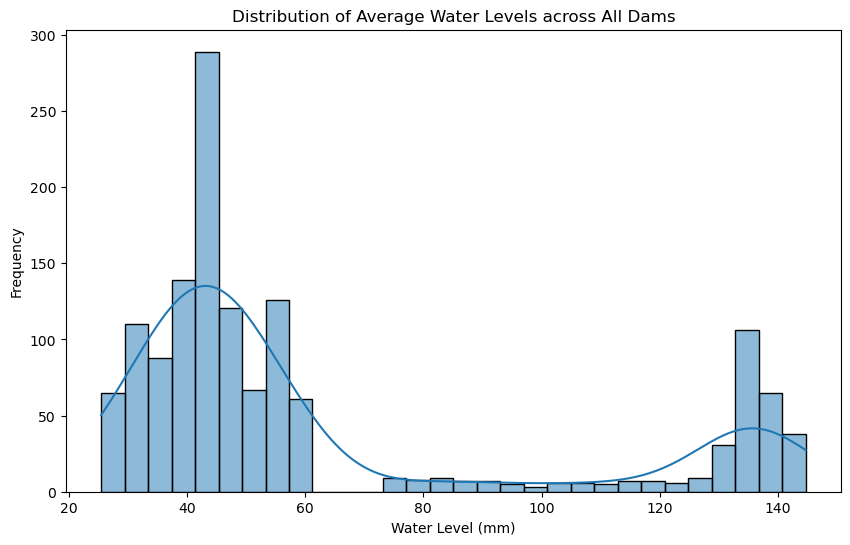

In [464]:
# Create a new column for the average water level across all dams
df_main['average_water_level'] = df_main[['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA']].mean(axis=1)

# Univariate Analysis for the average water level
plt.figure(figsize=(10, 6))
sns.histplot(df_main['average_water_level'], kde=True, bins=30)
plt.title('Distribution of Average Water Levels across All Dams')
plt.xlabel('Water Level (mm)')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

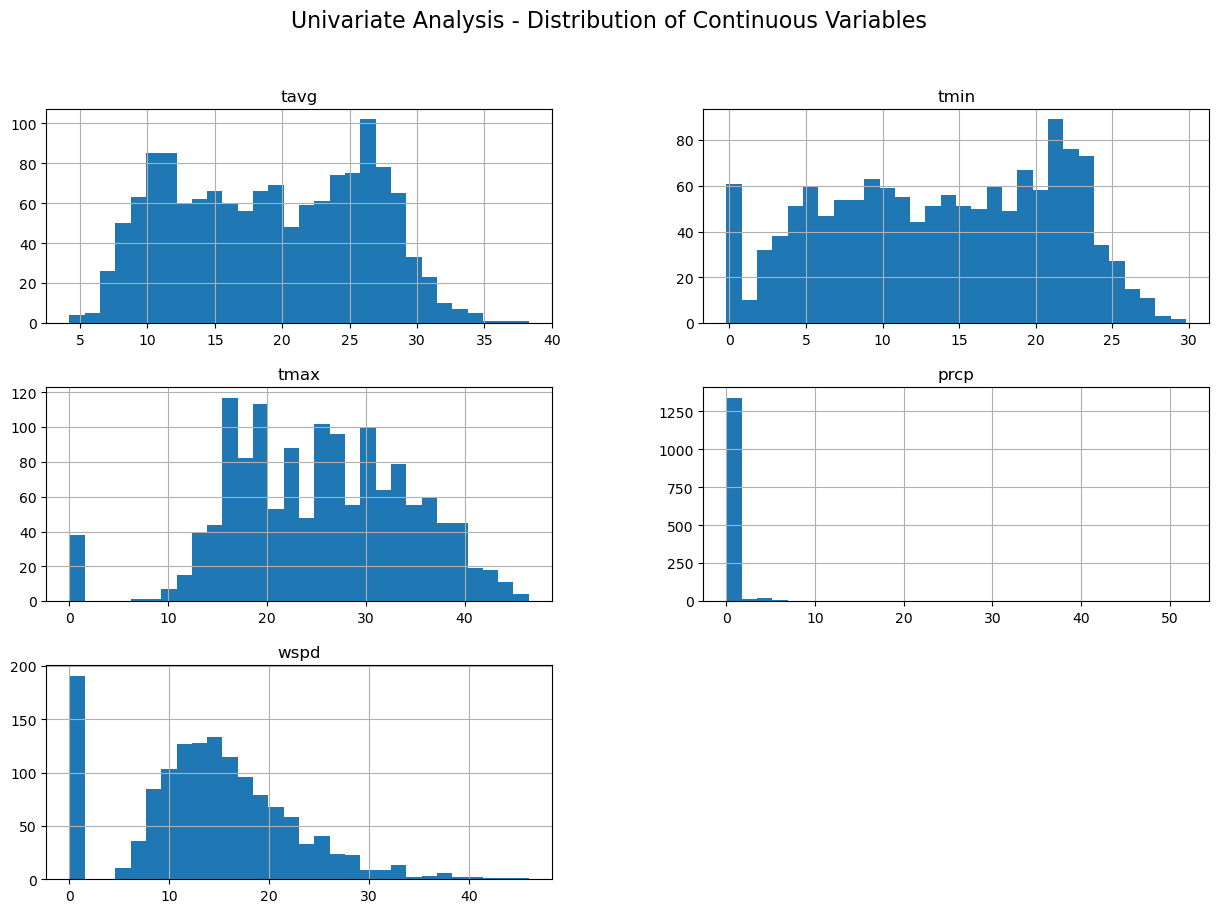

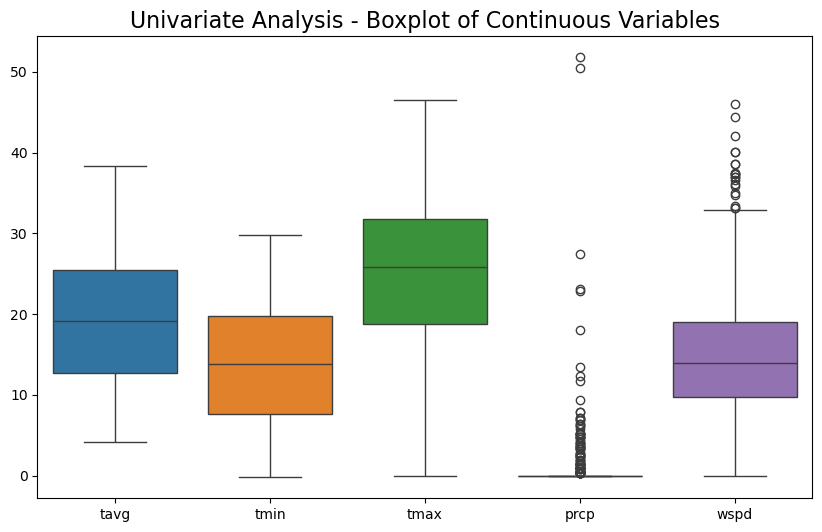

In [466]:
# Load your cleaned dataset
df = pd.read_csv('../../data/clean/cleaned_dataset_with_half_of_year.csv')

# Univariate Analysis: Histograms for continuous variables
plt.figure(figsize=(10, 6))
df[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']].hist(bins=30, figsize=(15, 10))
plt.suptitle("Univariate Analysis - Distribution of Continuous Variables", fontsize=16)
plt.show()

# Boxplots for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']])
plt.title("Univariate Analysis - Boxplot of Continuous Variables", fontsize=16)
plt.show()

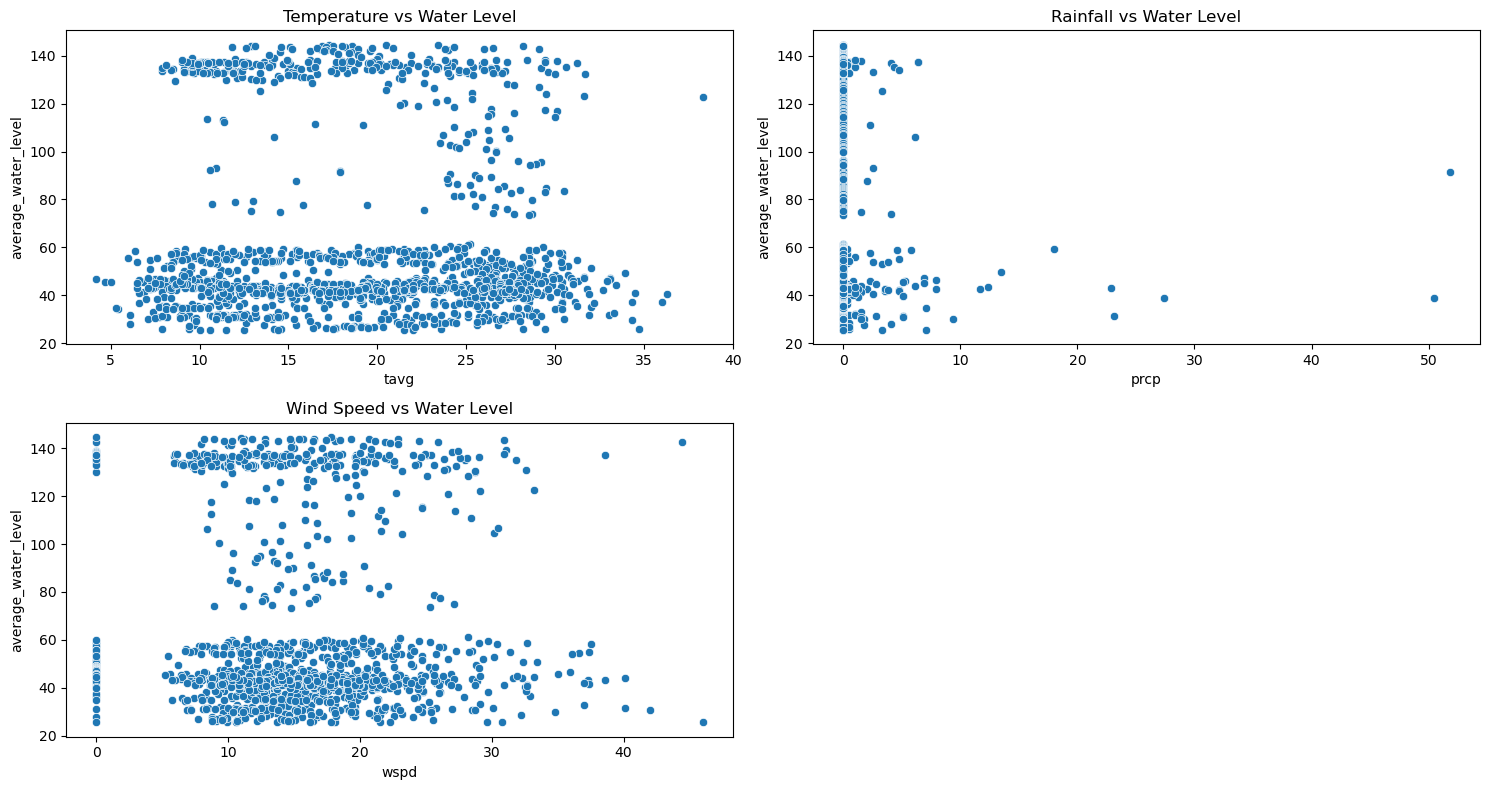

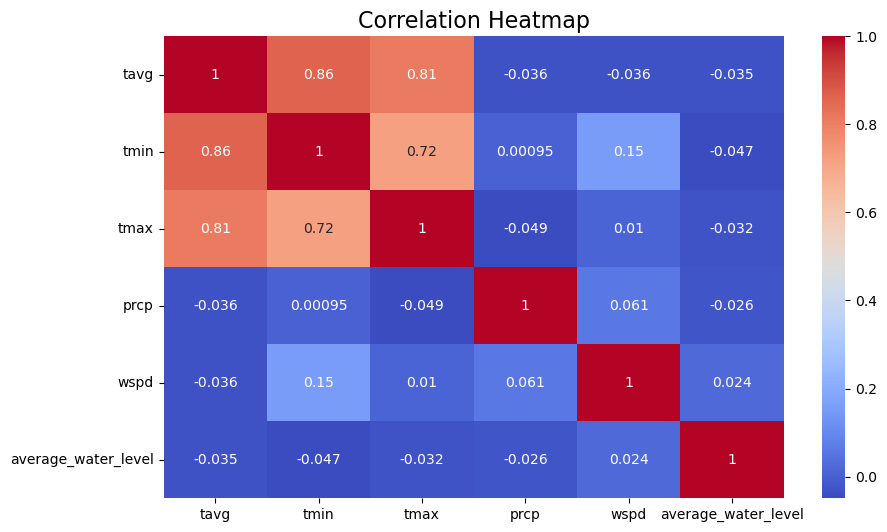

In [468]:
# Bivariate Analysis: Scatter plots to check relationships between continuous variables and target
plt.figure(figsize=(15, 8))

# Temperature vs. Water Level
plt.subplot(2, 2, 1)
sns.scatterplot(x='tavg', y='average_water_level', data=df)
plt.title("Temperature vs Water Level")

# Rainfall vs. Water Level
plt.subplot(2, 2, 2)
sns.scatterplot(x='prcp', y='average_water_level', data=df)
plt.title("Rainfall vs Water Level")

# Wind Speed vs. Water Level
plt.subplot(2, 2, 3)
sns.scatterplot(x='wspd', y='average_water_level', data=df)
plt.title("Wind Speed vs Water Level")

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'average_water_level']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


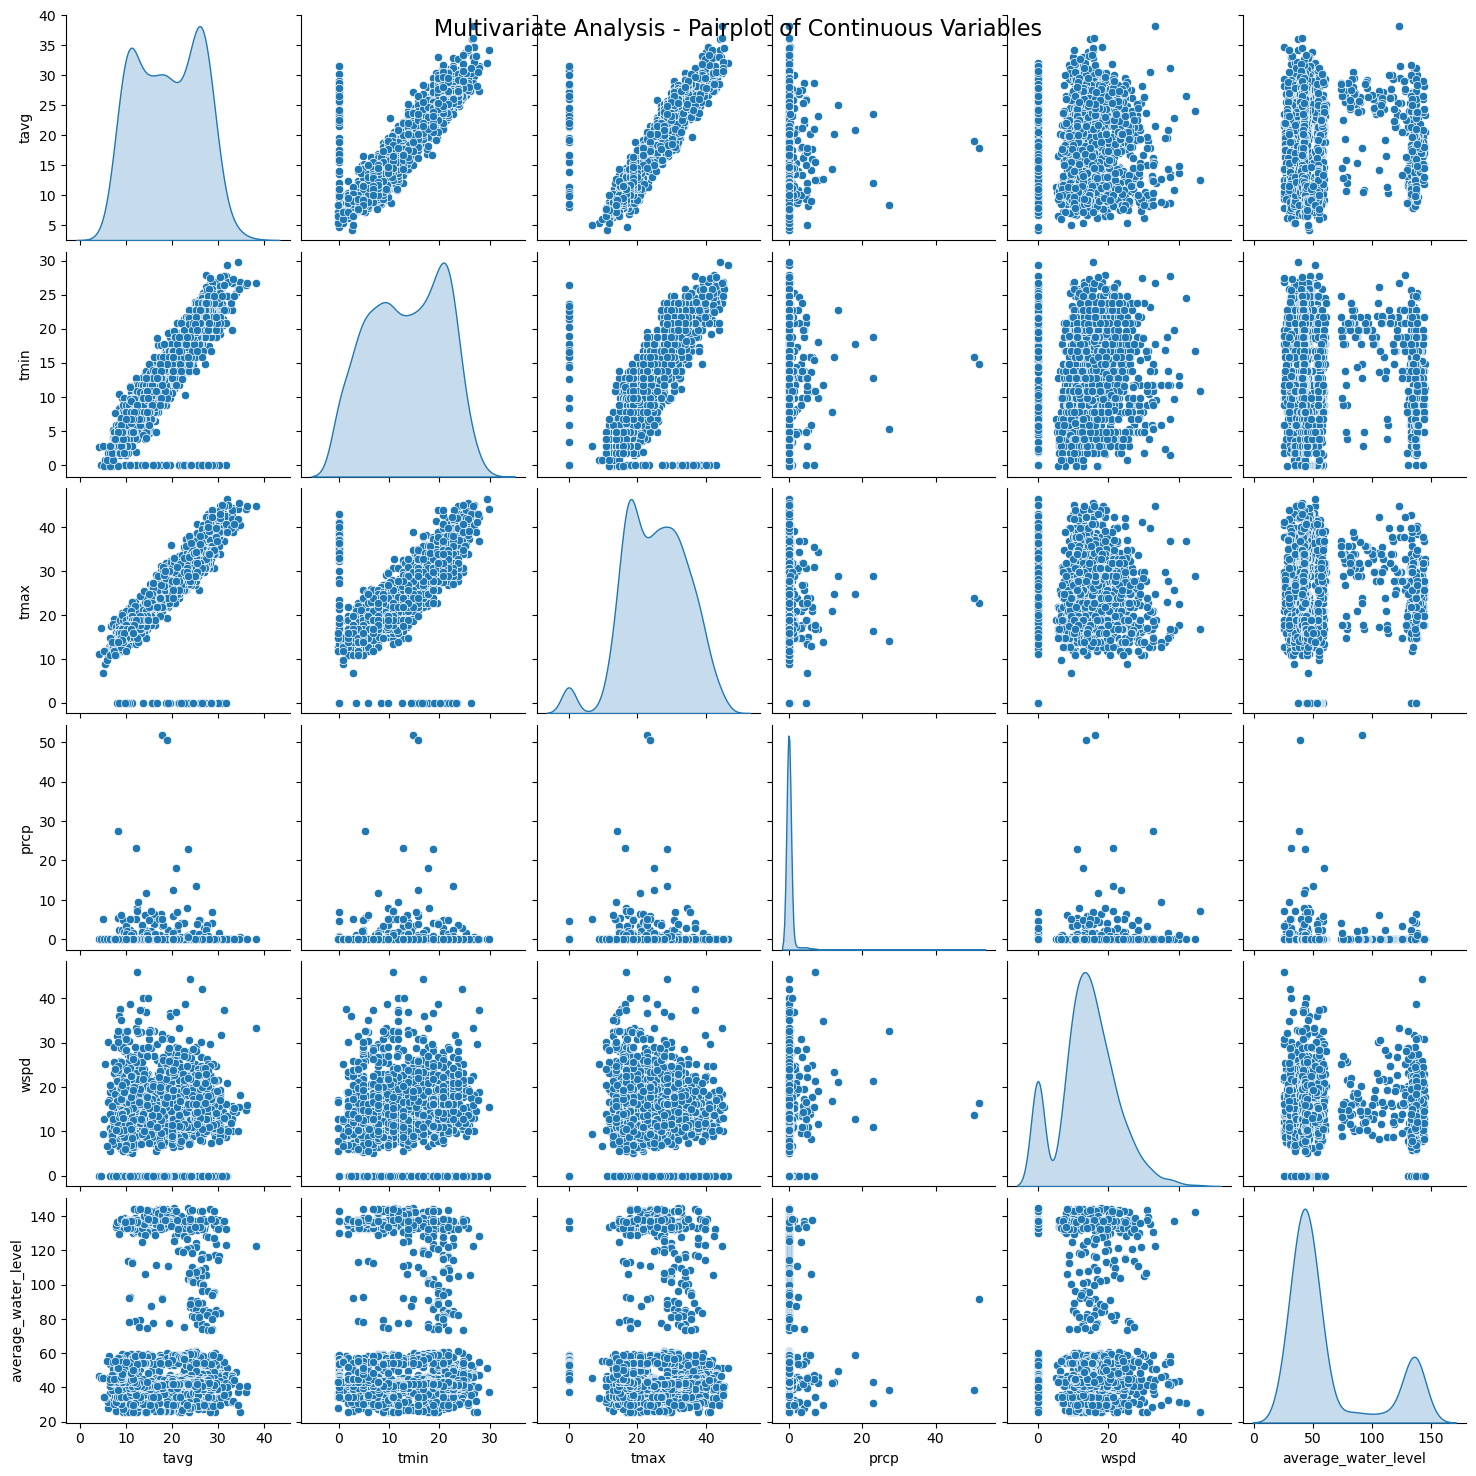

In [470]:
# Multivariate Analysis: Pairplot to show relationships between variables
sns.pairplot(df[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'average_water_level']], diag_kind='kde')
plt.suptitle("Multivariate Analysis - Pairplot of Continuous Variables", fontsize=16)
plt.show()


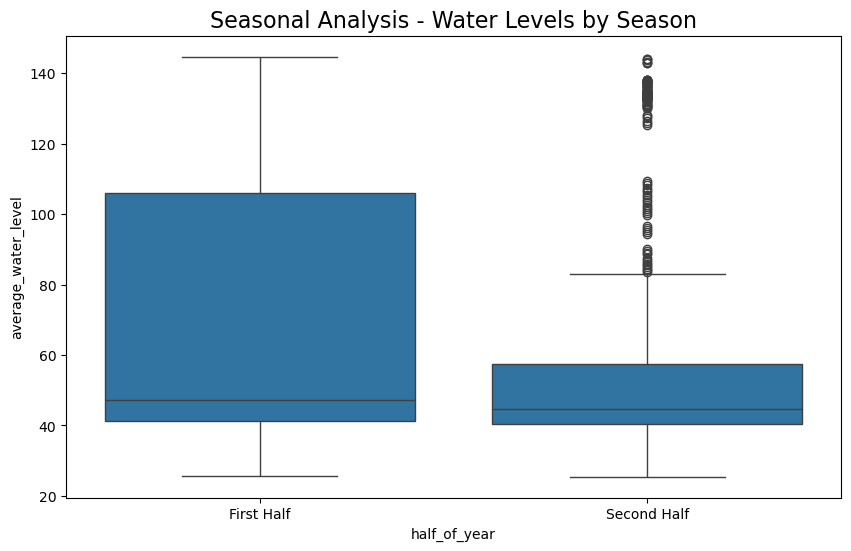

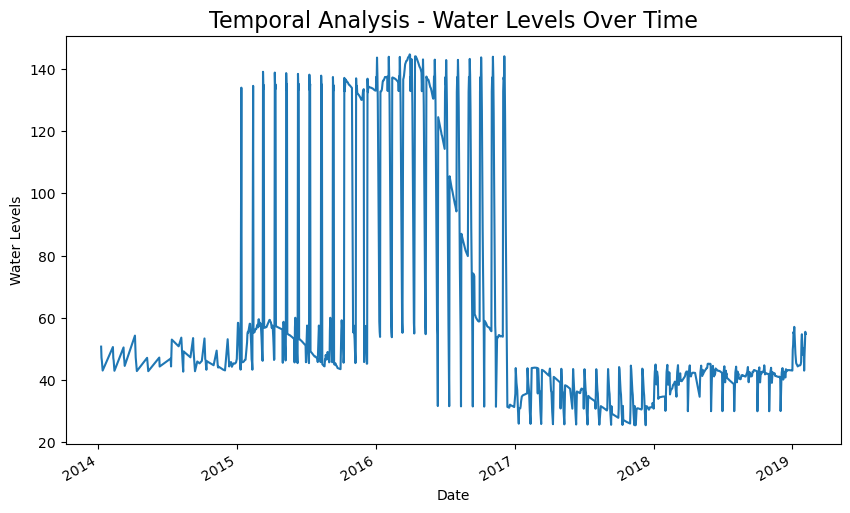

In [471]:
# Create a time-based index if not already done
df['date'] = pd.to_datetime(df['date'])

# Seasonal Analysis: Boxplot to show seasonal differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='half_of_year', y='average_water_level', data=df)
plt.title("Seasonal Analysis - Water Levels by Season", fontsize=16)
plt.show()

# Temporal Analysis: Time series plot of water levels over time
plt.figure(figsize=(10, 6))
df.set_index('date')['average_water_level'].plot()
plt.title("Temporal Analysis - Water Levels Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Water Levels")
plt.show()


In [472]:
from scipy import stats

# Hypothesis testing: Does rainfall significantly affect water levels?
# Null hypothesis: Rainfall has no effect on water levels.
# Alternative hypothesis: Rainfall has a significant effect on water levels.

# Pearson correlation test
corr, p_value = stats.pearsonr(df['prcp'], df['average_water_level'])
print(f"Pearson correlation between rainfall and water levels: {corr}")
print(f"P-value: {p_value}")

# If p_value < 0.05, we reject the null hypothesis
if p_value < 0.05:
    print("We reject the null hypothesis. Rainfall has a significant effect on water levels.")
else:
    print("We fail to reject the null hypothesis. Rainfall does not have a significant effect on water levels.")


Pearson correlation between rainfall and water levels: -0.025816796981644463
P-value: 0.3344075210239059
We fail to reject the null hypothesis. Rainfall does not have a significant effect on water levels.


In [476]:
# Assuming the dataset contains 'Year', 'Month', and 'Day' columns
tunis_dams_rain_data_cleaned['Date'] = pd.to_datetime(tunis_dams_rain_data_cleaned[['Year', 'Month', 'Day']])

# check if 'Date' is correctly created
print(tunis_dams_rain_data_cleaned['Date'].head())


0   2014-01-08
1   2014-01-09
2   2014-01-10
3   2014-01-12
4   2014-02-08
Name: Date, dtype: datetime64[ns]


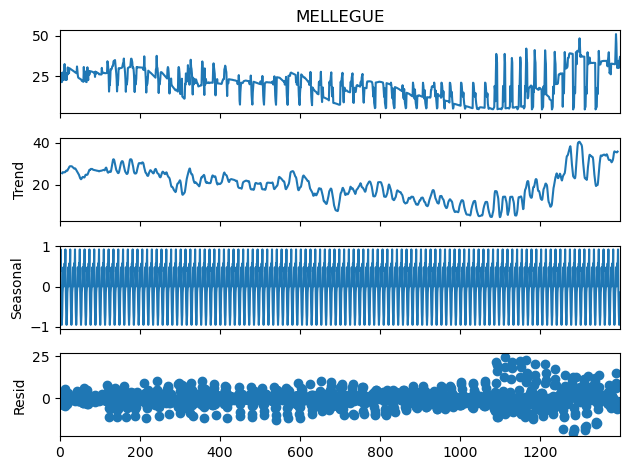

In [478]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'MELLEGUE' is the correct water level column
result = seasonal_decompose(tunis_dams_rain_data_cleaned['MELLEGUE'], model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()


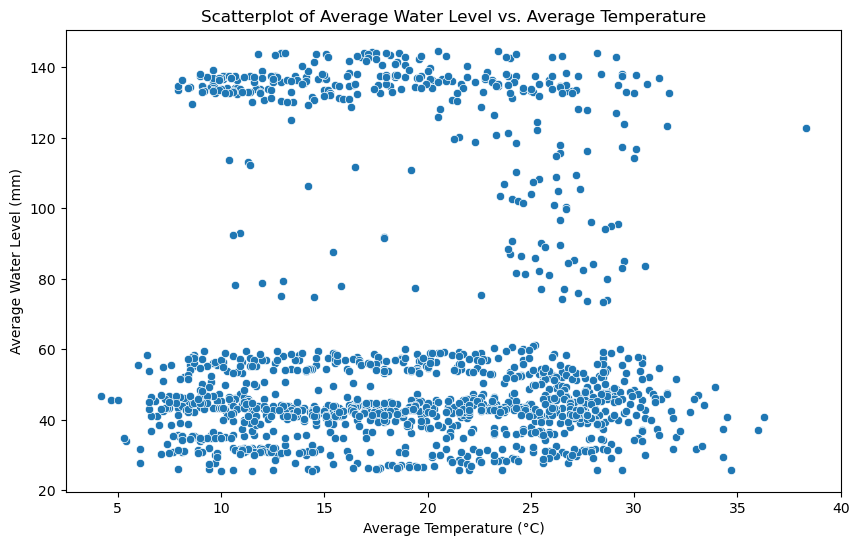

Correlation between average water level and temperature: -0.034996982146971674


In [480]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis: Scatterplot between average water level and average temperature (tavg)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tavg', y='average_water_level', data=df_main)
plt.title('Scatterplot of Average Water Level vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Water Level (mm)')
plt.show()

# Calculate correlation between average water level and temperature
correlation = df_main['average_water_level'].corr(df_main['tavg'])
print(f'Correlation between average water level and temperature: {correlation}')


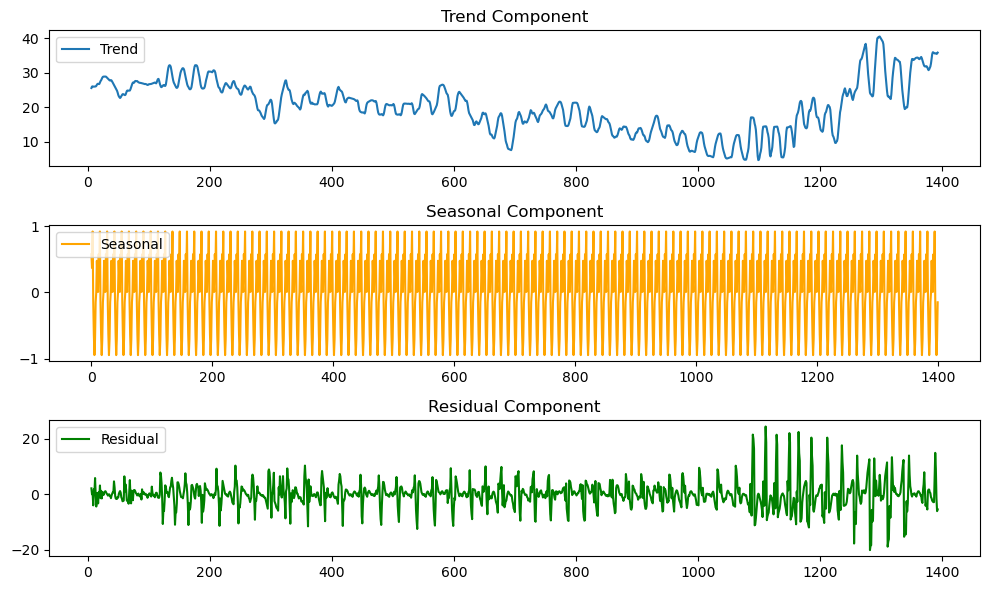

In [489]:
# Extract the trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Visualize each component individually for better understanding
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(trend, label='Trend')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(3, 1, 2)
plt.plot(seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(3, 1, 3)
plt.plot(residual, label='Residual', color='green')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [493]:
# Convert 'Date' column to datetime if not already done
tunis_dams_rain_data_cleaned['Date'] = pd.to_datetime(tunis_dams_rain_data_cleaned['Date'])

# Set 'Date' as the index
tunis_dams_rain_data_cleaned.set_index('Date', inplace=True)

# Now create month and seasonal features
tunis_dams_rain_data_cleaned['month'] = tunis_dams_rain_data_cleaned.index.month
tunis_dams_rain_data_cleaned['season'] = tunis_dams_rain_data_cleaned['month'].apply(lambda x: 'First Half' if x <= 6 else 'Second Half')

# Creating lag features for water levels
tunis_dams_rain_data_cleaned['lag_1'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(1)  # Lag by 1 day
tunis_dams_rain_data_cleaned['lag_7'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(7)  # Lag by 7 days (weekly effect)
tunis_dams_rain_data_cleaned['lag_30'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(30)  # Lag by 30 days (monthly effect)

# Drop any NaNs created by lagging
tunis_dams_rain_data_cleaned.dropna(inplace=True)

# Display the dataset to verify
display(tunis_dams_rain_data_cleaned.head())


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,Zarga,Ziatine,Year,Month,Day,month,season,lag_1,lag_7,lag_30
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-19,2014-07-19,28.918,49.780,68.860,61.775,477.385,75.458,88.650,8.256,93.073,...,0.0,0.0,2014,7,19,7,Second Half,29.087,26.789,26.721
2014-07-20,2014-07-20,28.749,49.669,68.738,61.656,475.200,75.072,88.320,8.287,92.764,...,0.0,0.0,2014,7,20,7,Second Half,28.918,29.932,21.315
2014-07-21,2014-07-21,28.547,49.557,68.656,61.617,473.014,74.821,87.992,8.196,92.459,...,0.0,0.0,2014,7,21,7,Second Half,28.749,29.763,26.113
2014-07-22,2014-07-22,28.344,49.446,68.533,61.538,470.828,74.569,87.664,8.165,92.217,...,0.0,0.0,2014,7,22,7,Second Half,28.547,29.594,25.978
2014-07-23,2014-07-23,28.175,49.335,68.411,61.459,468.662,74.380,87.337,8.135,91.854,...,0.0,0.0,2014,7,23,7,Second Half,28.344,29.425,26.519


In [501]:
# Check for non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns: ", non_numeric_columns)

# Drop non-numeric columns (like 'Date')
X = X.drop(columns=non_numeric_columns)

# If you need to keep date-related information, you can create year, month, day features
X['Year'] = pd.DatetimeIndex(tunis_dams_rain_data_cleaned.index).year
X['Month'] = pd.DatetimeIndex(tunis_dams_rain_data_cleaned.index).month
X['Day'] = pd.DatetimeIndex(tunis_dams_rain_data_cleaned.index).day


Non-numeric columns:  Index([], dtype='object')


In [503]:
# One-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)

# Check the resulting features after encoding
print(X.head())


            BEN METIR  KASSEB  BARBARA  SIDI SALEM  BOU-HEURTMA  JOUMINE  \
Date                                                                       
2014-07-19     49.780  68.860   61.775     477.385       75.458   88.650   
2014-07-20     49.669  68.738   61.656     475.200       75.072   88.320   
2014-07-21     49.557  68.656   61.617     473.014       74.821   87.992   
2014-07-22     49.446  68.533   61.538     470.828       74.569   87.664   
2014-07-23     49.335  68.411   61.459     468.662       74.380   87.337   

            GHEZALA  SEJNANE  S. EL BARRAK  SILIANA  ...   ABID  Zarga  \
Date                                                 ...                 
2014-07-19    8.256   93.073       275.950   24.374  ...  5.001    0.0   
2014-07-20    8.287   92.764       275.649   24.240  ...  4.976    0.0   
2014-07-21    8.196   92.459       275.649   24.105  ...  4.942    0.0   
2014-07-22    8.165   92.217       275.347   23.926  ...  4.900    0.0   
2014-07-23    8.135   9

In [505]:
# Defining X (features) and y (target)
y = tunis_dams_rain_data_cleaned['MELLEGUE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

# Manually calculate RMSE
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
print("Random Forest RMSE:", rmse)


Random Forest R²: 0.985167918790065
Random Forest RMSE: 1.056369731993444


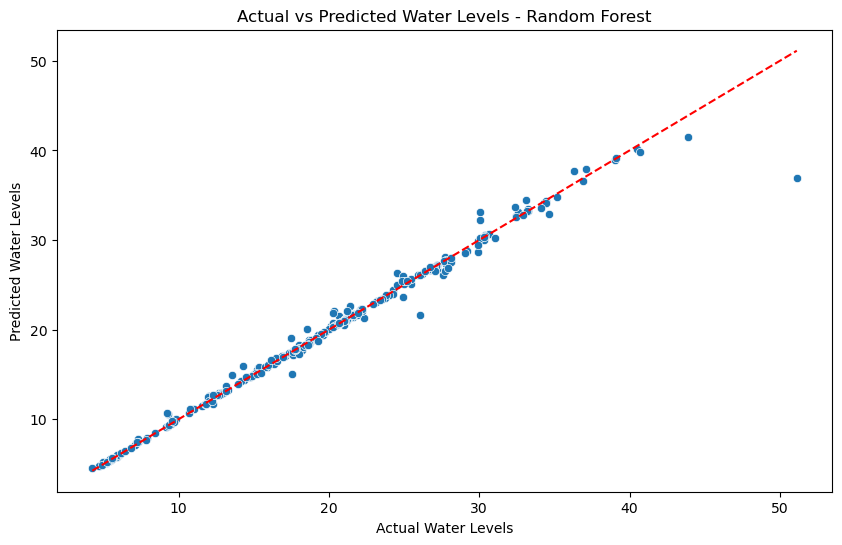

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot predicted vs actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels - Random Forest')
plt.show()


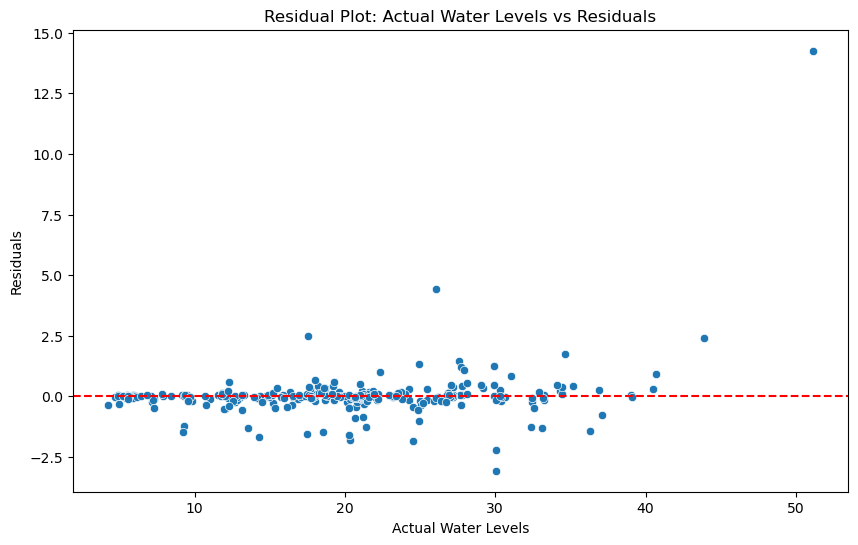

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_rf

# Create a scatter plot of residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Actual Water Levels vs Residuals')
plt.xlabel('Actual Water Levels')
plt.ylabel('Residuals')
plt.show()


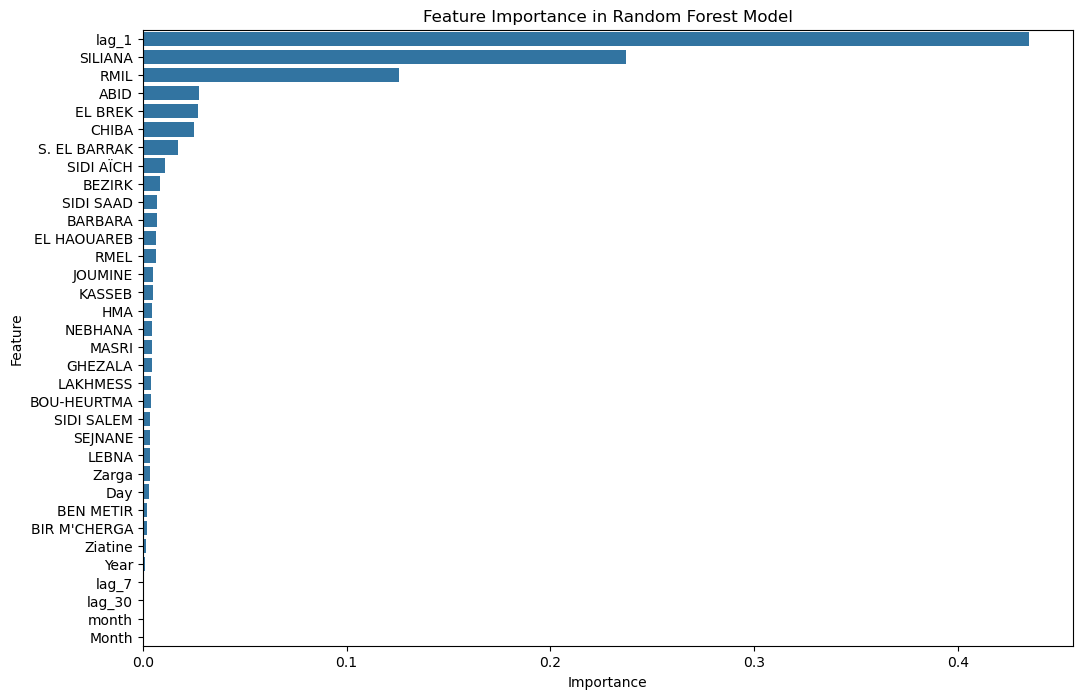

In [251]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation R² Score:", best_score)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation R² Score: 0.9808869252767515


In [257]:
# Create lag features for the water levels
# Here, we'll create lag features for 1 day, 7 days, and 30 days as an example
tunis_dams_rain_data_cleaned['lag_1'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(1)
tunis_dams_rain_data_cleaned['lag_7'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(7)
tunis_dams_rain_data_cleaned['lag_30'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(30)

# Drop rows with NaN values after creating lag features
tunis_dams_rain_data_cleaned.dropna(inplace=True)


In [298]:
import pandas as pd

# Load the cleaned weather and rain datasets
weather_data = pd.read_csv('../data/clean/weather_cleaned.csv')
rain_data = pd.read_csv('../data/clean/tunis_dams_rain_cleaned.csv')

# Ensure the Date columns are in datetime format
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
rain_data['Date'] = pd.to_datetime(rain_data['Date'])

# Display the first few rows to verify the data
print(weather_data.head())
print(rain_data.head())


KeyError: 'Date'

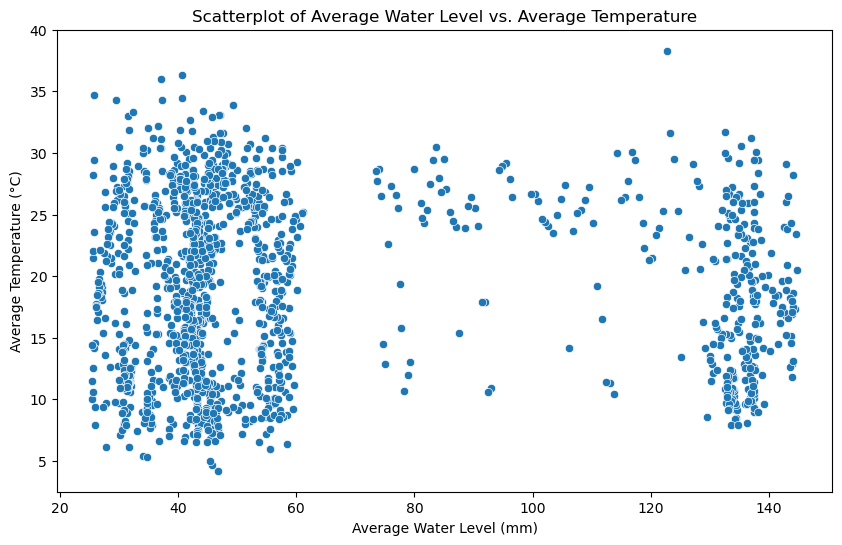

Correlation between average water level and temperature: -0.034996982146971674


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis: Scatterplot between average water level and average temperature (tavg)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_water_level', y='tavg', data=df_main)
plt.title('Scatterplot of Average Water Level vs. Average Temperature')
plt.xlabel('Average Water Level (mm)')
plt.ylabel('Average Temperature (°C)')
plt.show()

# Calculate correlation between average water level and temperature
correlation = df_main['average_water_level'].corr(df_main['tavg'])
print(f'Correlation between average water level and temperature: {correlation}')


In [74]:
#Bivariate Analysis: We are visualizing the relationship between the average water level and the average temperature using a scatterplot.
#Correlation: We calculate the correlation coefficient between these two variables to check for a linear relationship.

In [76]:
##Multivariate Analyse

<Figure size 1200x1000 with 0 Axes>

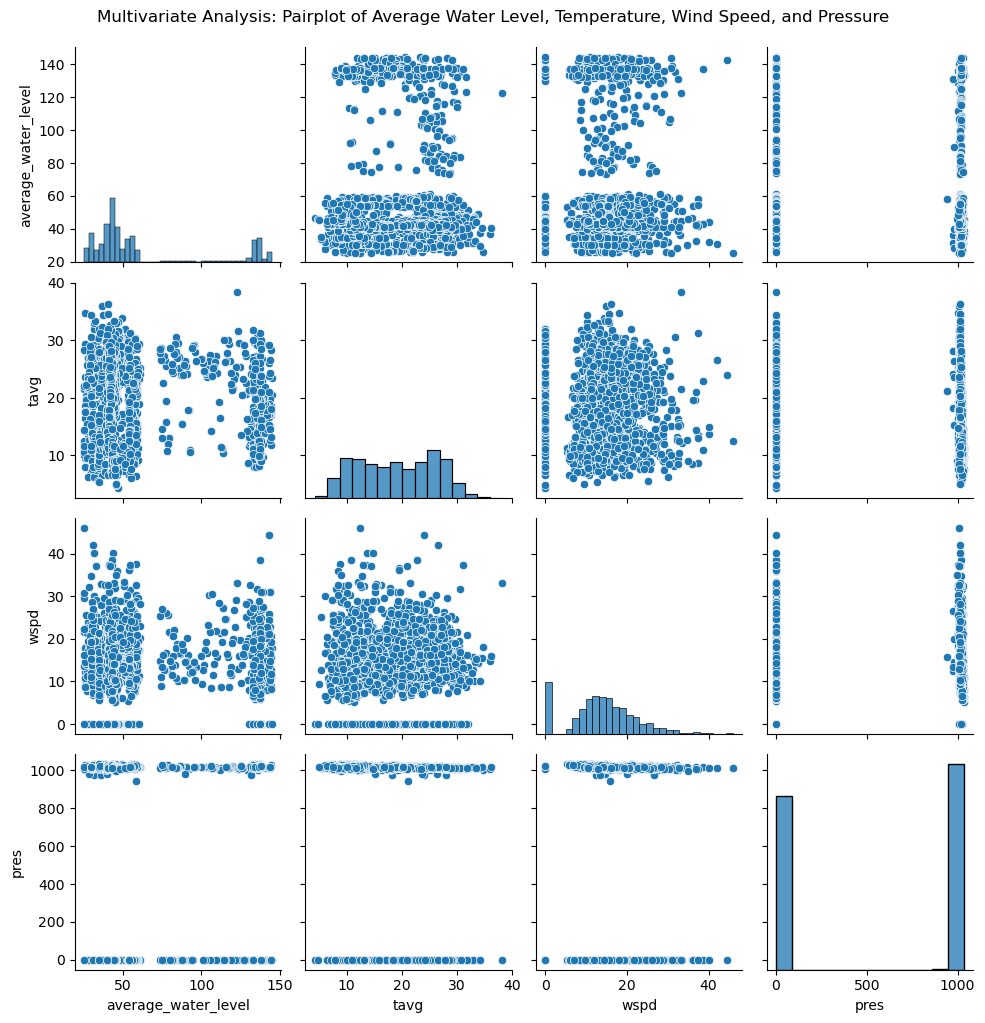

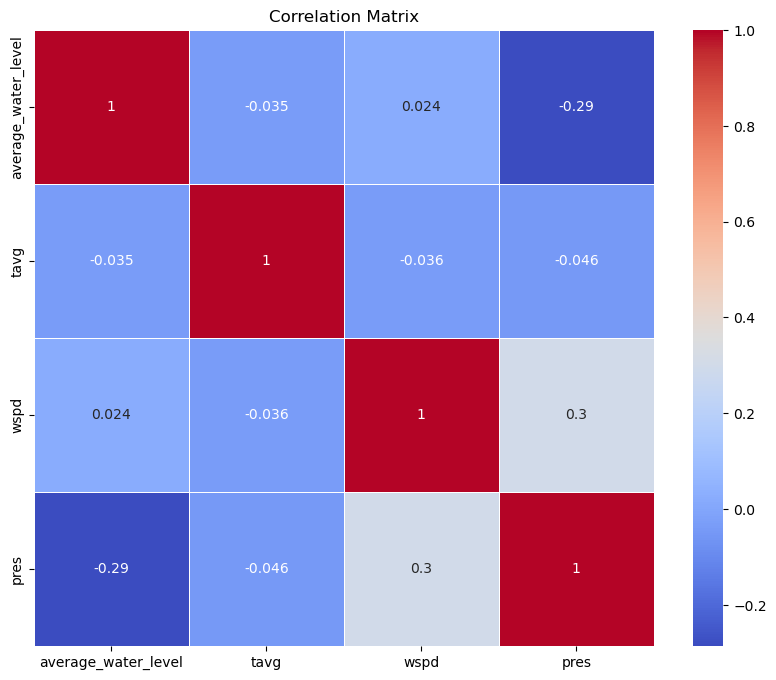

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged and cleaned dataset
df_main = pd.read_csv('/Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Iron_Hack_Water_in_Tunisia/data/clean/main.csv')

# Ensure 'average_water_level' exists
if 'average_water_level' not in df_main.columns:
    df_main['average_water_level'] = df_main[['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA']].mean(axis=1)

# Step 3: Multivariate Analysis

# Beispiel 1: Pairplot zur Visualisierung von Beziehungen zwischen mehreren Variablen
plt.figure(figsize=(12, 10))
sns.pairplot(df_main[['average_water_level', 'tavg', 'wspd', 'pres']]) # 'Month']], hue='Month')
plt.suptitle('Multivariate Analysis: Pairplot of Average Water Level, Temperature, Wind Speed, and Pressure', y=1.02)
plt.show()

# Beispiel 2: Heatmap der Korrelationsmatrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_main[['average_water_level', 'tavg', 'wspd', 'pres']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [70]:
# Step 1: Calculate the absolute correlations with 'average_water_level'
corr_with_target = abs(correlation_matrix['average_water_level']).sort_values(ascending=False)

# Step 2: Filter columns that have a correlation above 0.75 with the target
high_corr_columns = corr_with_target[corr_with_target > 0.75]
print("Columns highly correlated with 'average_water_level':")
print(high_corr_columns)

# Step 3: Check for multicollinearity within the subset of highly correlated columns
# Create a correlation matrix for the highly correlated columns
subset_corr_matrix = df_main[high_corr_columns.index].corr().abs()

# Step 4: Identify and drop highly correlated pairs (correlation above 0.75)
# We keep the column that has the highest correlation with 'average_water_level' and drop the other
for col1 in subset_corr_matrix.columns:
    for col2 in subset_corr_matrix.columns:
        if col1 != col2 and subset_corr_matrix.loc[col1, col2] > 0.75:
            # Drop the one with the smaller correlation with 'average_water_level'
            if corr_with_target[col1] > corr_with_target[col2]:
                print(f"Dropping {col2} as it is highly correlated with {col1}")
                df_main.drop(col2, axis=1, inplace=True)
            else:
                print(f"Dropping {col1} as it is highly correlated with {col2}")
                df_main.drop(col1, axis=1, inplace=True)


Columns highly correlated with 'average_water_level':
average_water_level    1.0
Name: average_water_level, dtype: float64


In [72]:
# Convert the date column to datetime format if it's not already
df_main['date'] = pd.to_datetime(df_main['date'])

# Create a new column that categorizes the data into the first six months or the last six months
df_main['half_of_year'] = df_main['date'].dt.month.apply(lambda x: 'First Half' if x <= 6 else 'Second Half')

# Verify the new column
df_main[['date', 'half_of_year']].head()


,date,half_of_year
0,2014-01-08,First Half
1,2014-01-09,First Half
2,2014-01-10,First Half
3,2014-01-12,First Half
4,2014-02-08,First Half


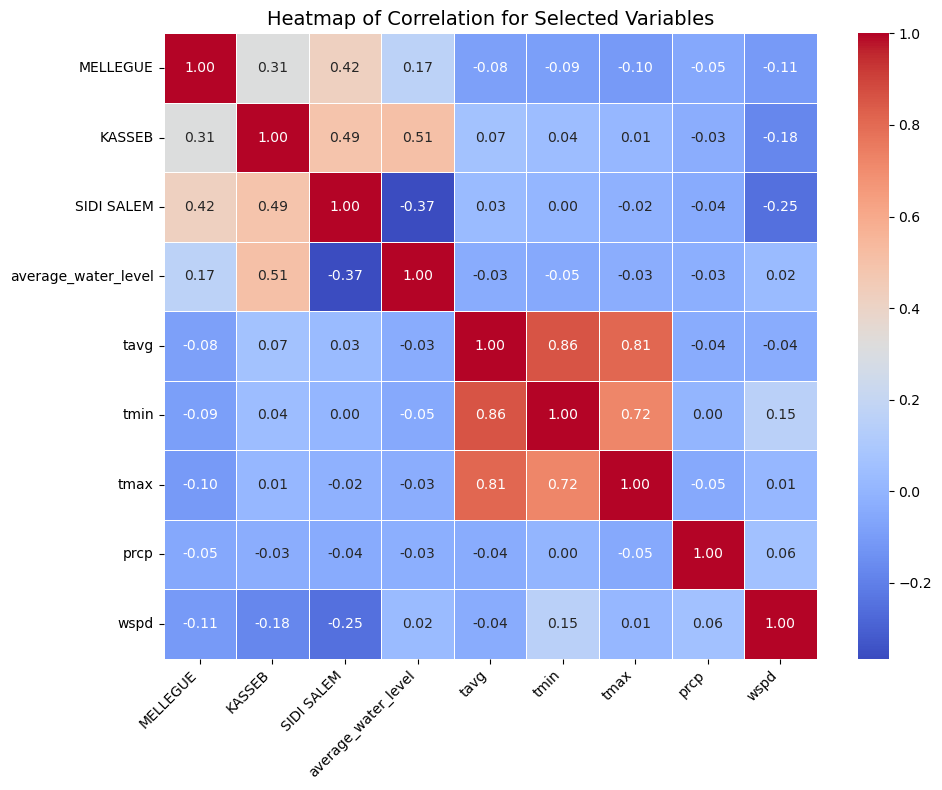

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of columns for the correlation matrix (focusing on relevant features)
columns_of_interest = ['MELLEGUE', 'KASSEB', 'SIDI SALEM', 'average_water_level', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd']

# Calculate the correlation matrix for the selected columns
subset_corr_matrix = df_main[columns_of_interest].corr()

# Plot the heatmap with a larger figure size and adjusted font size for better readability
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Heatmap of Correlation for Selected Variables', fontsize=14)
plt.tight_layout()  # To ensure everything fits
plt.show()


In [74]:
# Select only numerical columns for the correlation analysis
numerical_columns = df_main.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix for numerical columns only
correlation_matrix = df_main[numerical_columns].corr()
  
# Display the correlations of features with average_water_level in descending order
corr_with_target = abs(correlation_matrix[['average_water_level']]).sort_values(by='average_water_level', ascending=False)
print(corr_with_target)


                     average_water_level
average_water_level             1.000000
BARBARA                         0.986407
GHEZALA                         0.970667
HMA                             0.945390
RMIL                            0.934683
CHIBA                           0.931855
SEJNANE                         0.926601
NEBHANA                         0.888781
S. EL BARRAK                    0.766631
BEN METIR                       0.693185
BIR M'CHERGA                    0.688824
SIDI SAAD                       0.666000
JOUMINE                         0.611553
MASRI                           0.607590
ABID                            0.548269
BEZIRK                          0.528157
EL BREK                         0.506603
KASSEB                          0.505148
LEBNA                           0.487051
Zarga                           0.457492
Ziatine                         0.438851
LAKHMESS                        0.435165
SILIANA                         0.413498
SIDI SALEM      

In [76]:
# Check for missing values in the columns
df_main[['snow', 'wpgt', 'tsun']].isna().sum()

# Check for the data types of these columns
print(df_main[['snow', 'wpgt', 'tsun']].dtypes)

# Check if these columns have only a single unique value
print(df_main[['snow', 'wpgt', 'tsun']].nunique())


snow    float64
wpgt    float64
tsun    float64
dtype: object
snow    1
wpgt    1
tsun    1
dtype: int64


In [90]:
df_main = df_main.drop(columns=['snow', 'wpgt', 'tsun'])


In [187]:
# Only fill missing values if the column exists
if 'snow' in df_main.columns:
    df_main['snow'].fillna(0, inplace=True)

if 'wpgt' in df_main.columns:
    df_main['wpgt'].fillna(0, inplace=True)

if 'tsun' in df_main.columns:
    df_main['tsun'].fillna(0, inplace=True)

print(df_main.columns)



Index(['date', 'MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA', 'SIDI SALEM',
       'BOU-HEURTMA', 'JOUMINE', 'GHEZALA', 'SEJNANE', 'S. EL BARRAK',
       'SILIANA', 'LAKHMESS', 'RMIL', 'BIR M'CHERGA', 'RMEL', 'NEBHANA',
       'SIDI SAAD', 'EL HAOUAREB', 'SIDI AÏCH', 'EL BREK', 'BEZIRK', 'CHIBA',
       'MASRI', 'LEBNA', 'HMA', 'ABID', 'Zarga', 'Ziatine', 'Year_x',
       'Month_x', 'Day_x', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd',
       'pres', 'Year_y', 'Month_y', 'Day_y', 'average_water_level',
       'half_of_year', 'season'],
      dtype='object')


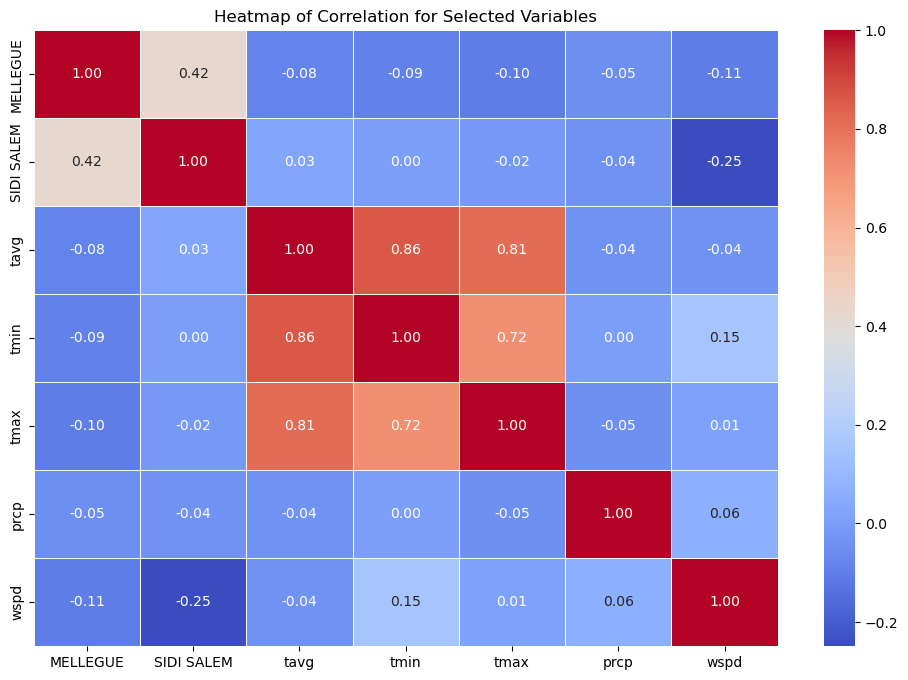

In [94]:
# Step 1: Select a subset of columns for correlation analysis
columns_of_interest = ['MELLEGUE', 'SIDI SALEM', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd']
subset_corr_matrix = df_main[columns_of_interest].corr()

# Step 2: Plot the heatmap with fewer variables
plt.figure(figsize=(12, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap of Correlation for Selected Variables')
plt.show()


In [80]:
import sys
print(sys.executable)


/opt/anaconda3/envs/Water_Tunisia_env/bin/python


In [82]:
# Select features (X) and target variable (y)
X = df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']]  # Example features
y = df_main['average_water_level']  # Target variable (replace with your column)

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)


# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 1526.2670400802328
R-squared (R²): -0.01691513006183354


In [86]:
# Convert the 'date' column to datetime format if it's not already
df_main['date'] = pd.to_datetime(df_main['date'])


# Check if the conversion was successful
df_main['date'].head()


0   2014-01-08
1   2014-01-09
2   2014-01-10
3   2014-01-12
4   2014-02-08
Name: date, dtype: datetime64[ns]

In [88]:
# Define a function to map each month to a season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create a new column 'season' by applying the function to the 'month' extracted from the 'date' column
df_main['season'] = df_main['date'].dt.month.apply(get_season)

# Check the first few rows to verify the 'season' feature
df_main[['date', 'season']].head()


,date,season
0,2014-01-08,Winter
1,2014-01-09,Winter
2,2014-01-10,Winter
3,2014-01-12,Winter
4,2014-02-08,Winter


In [90]:
# Create a new column to categorize into the first half and second half of the year
df_main['half_of_year'] = df_main['date'].dt.month.apply(lambda x: 'First Half' if x <= 6 else 'Second Half')

# Check the first few rows to verify the 'half_of_year' feature
df_main[['date', 'half_of_year']].head()


,date,half_of_year
0,2014-01-08,First Half
1,2014-01-09,First Half
2,2014-01-10,First Half
3,2014-01-12,First Half
4,2014-02-08,First Half


In [92]:
# Display the new time-based features
df_main[['date', 'season', 'half_of_year']].head()


,date,season,half_of_year
0,2014-01-08,Winter,First Half
1,2014-01-09,Winter,First Half
2,2014-01-10,Winter,First Half
3,2014-01-12,Winter,First Half
4,2014-02-08,Winter,First Half


In [94]:
import os

# Define the relative path to the 'clean' directory and the file path
clean_dir = '../../data/clean'
file_path = f'{clean_dir}/cleaned_dataset_with_half_of_year.csv'

# Step 1: Check if the directory exists, if not, create it
if not os.path.exists(clean_dir):
    os.makedirs(clean_dir)
    print(f"Directory '{clean_dir}' created.")

# Step 2: Check if the file already exists, if not, create the new dataset with 'half_of_year' and save it
if not os.path.isfile(file_path):
    # Assuming df_main exists and contains your main data
    # Add the 'half_of_year' feature based on the 'date' column
    df_main['half_of_year'] = df_main['date'].apply(lambda x: 'First Half' if x.month <= 6 else 'Second Half')

    # Save the dataset with the 'half_of_year' feature to the clean directory
    df_main.to_csv(file_path, index=False)
    print(f"Dataset saved with 'half_of_year' feature at '{file_path}'.")
else:
    print(f"File '{file_path}' already exists, not overwriting.")



File '../../data/clean/cleaned_dataset_with_half_of_year.csv' already exists, not overwriting.


In [96]:
from sklearn.preprocessing import PolynomialFeatures

# Select the numerical features that could benefit from interaction and polynomial terms
selected_features = df_main[['tavg', 'wspd', 'pres']]

# Initialize PolynomialFeatures (degree=2 creates square and interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the selected features
poly_features = poly.fit_transform(selected_features)

# Automatically get feature names after fitting
poly_feature_names = poly.get_feature_names_out()

# Create a new DataFrame for the polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate the polynomial features with the original dataframe
df_main = pd.concat([df_main, poly_df], axis=1)

# Display the new columns to ensure that the polynomial features are added
print(df_main.columns)


Index(['date', 'MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA', 'SIDI SALEM',
       'BOU-HEURTMA', 'JOUMINE', 'GHEZALA', 'SEJNANE', 'S. EL BARRAK',
       'SILIANA', 'LAKHMESS', 'RMIL', 'BIR M'CHERGA', 'RMEL', 'NEBHANA',
       'SIDI SAAD', 'EL HAOUAREB', 'SIDI AÏCH', 'EL BREK', 'BEZIRK', 'CHIBA',
       'MASRI', 'LEBNA', 'HMA', 'ABID', 'Zarga', 'Ziatine', 'Year_x',
       'Month_x', 'Day_x', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir',
       'wspd', 'wpgt', 'pres', 'tsun', 'Year_y', 'Month_y', 'Day_y',
       'average_water_level', 'half_of_year', 'season', 'tavg', 'wspd', 'pres',
       'tavg^2', 'tavg wspd', 'tavg pres', 'wspd^2', 'wspd pres', 'pres^2'],
      dtype='object')


In [98]:
# Display the first few rows with the new polynomial features
df_main[poly_feature_names].head()


,tavg,tavg,wspd,wspd,pres,pres,tavg^2,tavg wspd,tavg pres,wspd^2,wspd pres,pres^2
0,9.5,9.5,0.0,0.0,0.0,0.0,90.25,0.00,0.0,0.00,0.0,0.0
1,9.9,9.9,10.7,10.7,0.0,0.0,98.01,105.93,0.0,114.49,0.0,0.0
2,10.7,10.7,8.3,8.3,0.0,0.0,114.49,88.81,0.0,68.89,0.0,0.0
3,12.1,12.1,0.0,0.0,0.0,0.0,146.41,0.00,0.0,0.00,0.0,0.0
4,13.1,13.1,16.4,16.4,0.0,0.0,171.61,214.84,0.0,268.96,0.0,0.0


In [100]:
# Check the number of zeros in the original features
zero_counts = (df_main[['tavg', 'wspd', 'pres']] == 0).sum()
print(zero_counts)

# Check for missing values
missing_counts = df_main[['tavg', 'wspd', 'pres']].isna().sum()
print(missing_counts)
# Check the number of zeros in the original features
zero_counts = (df_main[['tavg', 'wspd', 'pres']] == 0).sum()
print(zero_counts)

# Check for missing values
missing_counts = df_main[['tavg', 'wspd', 'pres']].isna().sum()
print(missing_counts)


tavg      0
tavg      0
wspd    191
wspd    191
pres    640
pres    640
dtype: int64
tavg    0
tavg    0
wspd    0
wspd    0
pres    0
pres    0
dtype: int64
tavg      0
tavg      0
wspd    191
wspd    191
pres    640
pres    640
dtype: int64
tavg    0
tavg    0
wspd    0
wspd    0
pres    0
pres    0
dtype: int64


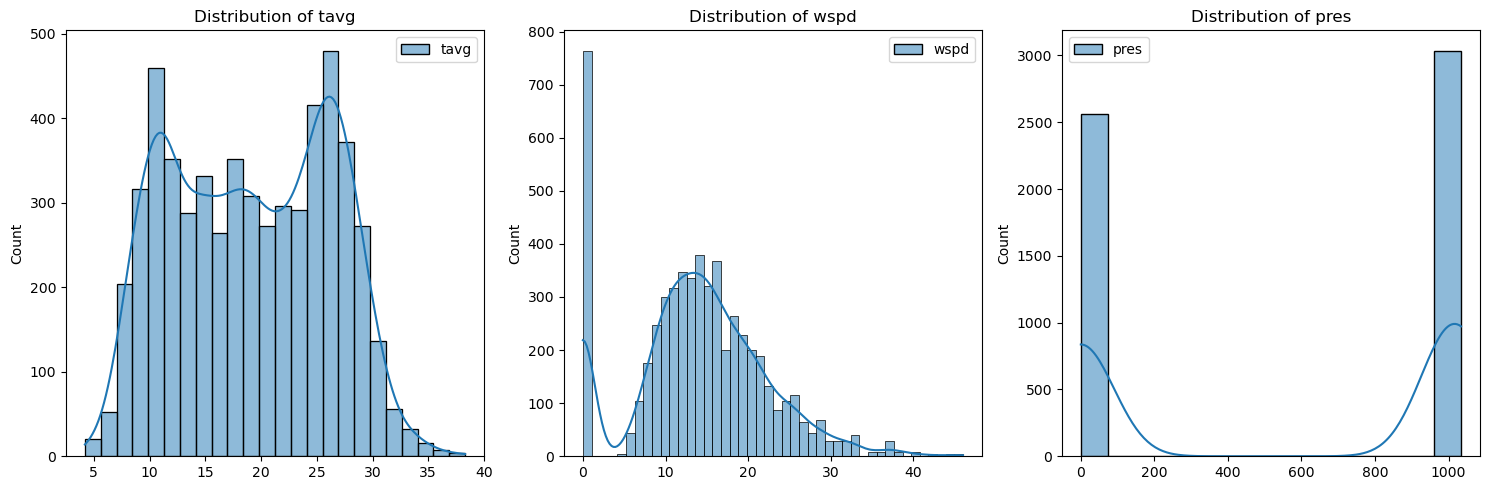

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of original features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_main['tavg'], kde=True)
plt.title('Distribution of tavg')

plt.subplot(1, 3, 2)
sns.histplot(df_main['wspd'], kde=True)
plt.title('Distribution of wspd')

plt.subplot(1, 3, 3)
sns.histplot(df_main['pres'], kde=True)
plt.title('Distribution of pres')

plt.tight_layout()
plt.show()


In [104]:
#Replace zeros with mean (if they are not valid)
df_main['wspd'] = df_main['wspd'].replace(0, df_main['wspd'].mean())
df_main['pres'] = df_main['pres'].replace(0, df_main['pres'].mean())

# Recreate polynomial features after handling zeros
poly_features = poly.fit_transform(df_main[['tavg', 'wspd', 'pres']])
poly_feature_names = poly.get_feature_names_out()
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate the polynomial features with the original dataframe
df_main = pd.concat([df_main, poly_df], axis=1)

# Display the first few rows of the updated dataframe
print(df_main[poly_feature_names].head())


   tavg  tavg  tavg  tavg  tavg  tavg  tavg  tavg       wspd       wspd  ...  \
0   9.5   9.5   9.5   9.5   9.5   9.5   9.5   9.5  14.049571  14.049571  ...   
1   9.9   9.9   9.9   9.9   9.9   9.9   9.9   9.9  10.700000  10.700000  ...   
2  10.7  10.7  10.7  10.7  10.7  10.7  10.7  10.7   8.300000   8.300000  ...   
3  12.1  12.1  12.1  12.1  12.1  12.1  12.1  12.1  14.049571  14.049571  ...   
4  13.1  13.1  13.1  13.1  13.1  13.1  13.1  13.1  16.400000  16.400000  ...   

     wspd pres    wspd pres    wspd pres  pres^2         pres^2  \
0  7750.241356  7750.241356  7750.241356     0.0  304301.646055   
1  5902.499086  5902.499086  5902.499086     0.0  304301.646055   
2  4578.574057  4578.574057  4578.574057     0.0  304301.646055   
3  7750.241356  7750.241356  7750.241356     0.0  304301.646055   
4  9046.821029  9046.821029  9046.821029     0.0  304301.646055   

          pres^2      pres pres  pres^2         pres^2         pres^2  
0  304301.646055  304301.646055     0.0  304

In [106]:
#retraining the model 

In [108]:
# Select the new polynomial features and the target variable
X_poly = df_main[poly_feature_names]  # Features with polynomial terms
y = df_main['average_water_level']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) with Polynomial Features: {mse}")
print(f"R-squared (R²) with Polynomial Features: {r2}")


Mean Squared Error (MSE) with Polynomial Features: 1318.640599295976
R-squared (R²) with Polynomial Features: 0.11493400757838035


In [110]:
#The addition of polynomial features has clearly improved the model. The MSE has decreased, and the R-squared has gone from negative to positive,
#which means the model is now capturing some of the underlying relationships in the data.

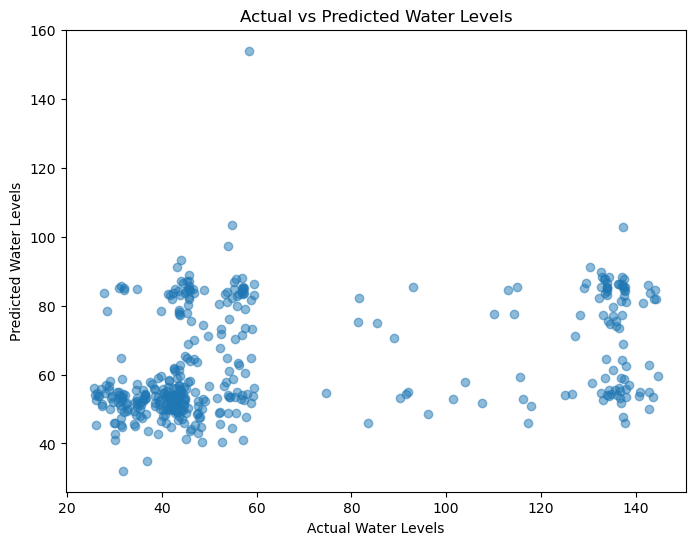

In [114]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Water Levels')
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.show()


Random Forest with Seasonal Features - Mean Squared Error: 1506.223294704341
Random Forest with Seasonal Features - R² Score: -0.003560463151919935


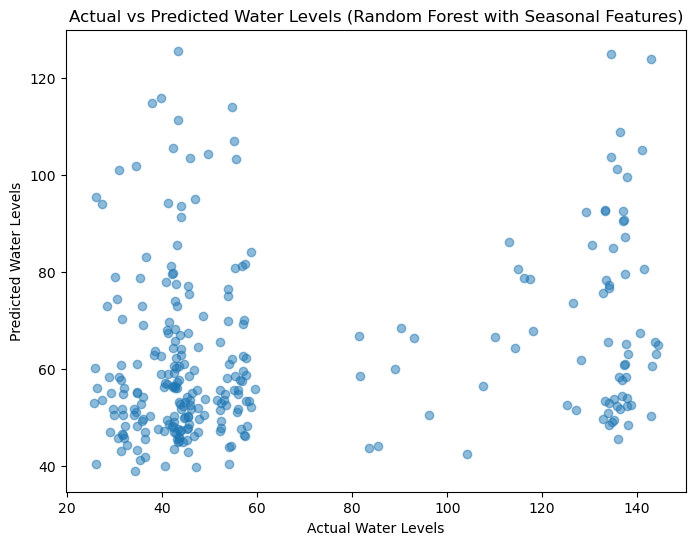

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Create time-based seasonal features if not already done
df_main['half_of_year'] = df_main['date'].dt.month.apply(lambda x: 'First Half' if x <= 6 else 'Second Half')

# Step 2: Use one-hot encoding to create dummy variables for the seasons (First Half, Second Half)
df_main = pd.get_dummies(df_main, columns=['half_of_year'], drop_first=True)

# Step 3: Select features (X) and target variable (y), including the seasonal features
X = df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'half_of_year_Second Half']]  # Add seasonal feature
y = df_main['average_water_level']  # Target variable

# Step 4: Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 6: Train the model
rf_model.fit(X_train, y_train)

# Step 7: Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Step 8: Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest with Seasonal Features - Mean Squared Error: {mse_rf}")
print(f"Random Forest with Seasonal Features - R² Score: {r2_rf}")

# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Random Forest with Seasonal Features)')
plt.show()



In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Output the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance of the tuned model
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf)
r2_rf_tuned = r2_score(y_test, y_pred_rf)

print(f"Tuned Random Forest - Mean Squared Error: {mse_rf_tuned}")
print(f"Tuned Random Forest - R² Score: {r2_rf_tuned}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest - Mean Squared Error: 1447.8844190930427
Tuned Random Forest - R² Score: 0.035309330745225354


In [119]:
# Convert the date column to datetime format if it's not already
df_main['date'] = pd.to_datetime(df_main['date'])

# Create a new column that categorizes the data into the first six months or the last six months
df_main['half_of_year'] = df_main['date'].dt.month.apply(lambda x: 'First Half' if x <= 6 else 'Second Half')

# Verify the new column
print(df_main[['date', 'half_of_year']].head())


        date half_of_year
0 2014-01-08   First Half
1 2014-01-09   First Half
2 2014-01-10   First Half
3 2014-01-12   First Half
4 2014-02-08   First Half


Dataset loaded from '../../data/clean/cleaned_dataset_with_half_of_year.csv'.
Ridge Regression with Seasonal Features - Mean Squared Error: 1518.6264597359082
Ridge Regression with Seasonal Features - R² Score: -0.011824394593819898


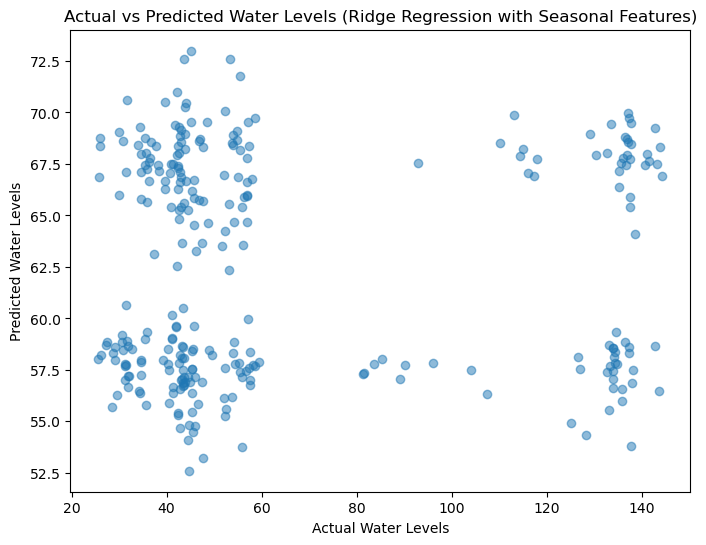

In [120]:
import os
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the file path
file_path = '../../data/clean/cleaned_dataset_with_half_of_year.csv'

# Step 1: Load the dataset if it exists
if os.path.isfile(file_path):
    df_main = pd.read_csv(file_path)
    print(f"Dataset loaded from '{file_path}'.")
else:
    raise FileNotFoundError(f"File '{file_path}' does not exist. Please check the file path or generate the dataset first.")

# Step 2: One-hot encode the 'half_of_year' feature and include other features
X = pd.get_dummies(df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'half_of_year']], drop_first=True)
y = df_main['average_water_level']

# Step 3: Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Step 5: Train the Ridge model
ridge_model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Step 7: Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Step 8: Display the evaluation metrics
print(f"Ridge Regression with Seasonal Features - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression with Seasonal Features - R² Score: {r2_ridge}")

# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Ridge Regression with Seasonal Features)')
plt.show()


Dataset loaded from '../../data/clean/cleaned_dataset_with_half_of_year.csv'.
Gradient Boosting with Seasonal Features - Mean Squared Error: 1504.4878663493969
Gradient Boosting with Seasonal Features - R² Score: -0.0024041888532964073


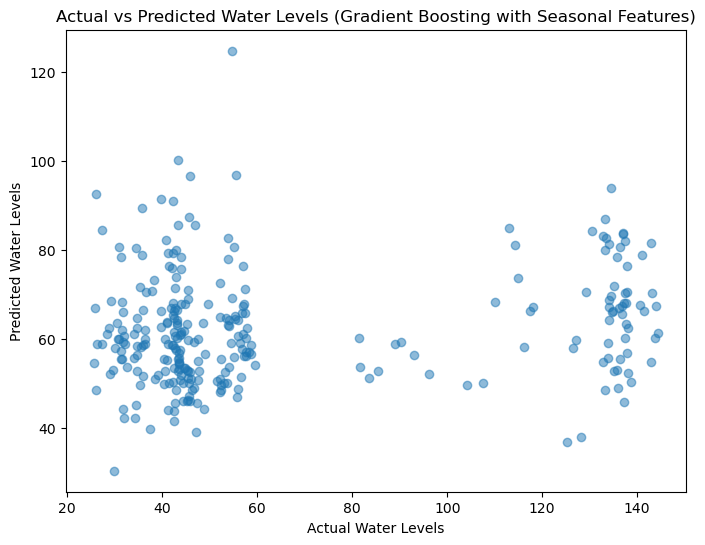

In [126]:

# Define the file path
file_path = '../../data/clean/cleaned_dataset_with_half_of_year.csv'

# Step 1: Load the dataset if it exists
if os.path.isfile(file_path):
    df_main = pd.read_csv(file_path)
    print(f"Dataset loaded from '{file_path}'.")
else:
    raise FileNotFoundError(f"File '{file_path}' does not exist. Please check the file path or generate the dataset first.")

# Step 2: One-hot encode the 'half_of_year' feature and include other features
X = pd.get_dummies(df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'half_of_year']], drop_first=True)
y = df_main['average_water_level']

# Step 3: Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 5: Train the model
gb_model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Step 7: Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting with Seasonal Features - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting with Seasonal Features - R² Score: {r2_gb}")

# Step 8: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Gradient Boosting with Seasonal Features)')
plt.show()


In [128]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Gradient Boosting model
gboost = GradientBoostingRegressor(random_state=42)

# Setup Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_gboost = grid_search.best_estimator_

# Output the best hyperparameters found
print(f"Best hyperparameters found: {best_params}")


Best hyperparameters found: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


Tuned Gradient Boosting – Mean Squared Error: 1518.1195707434772
Tuned Gradient Boosting – R² Score: -0.011486666612982477


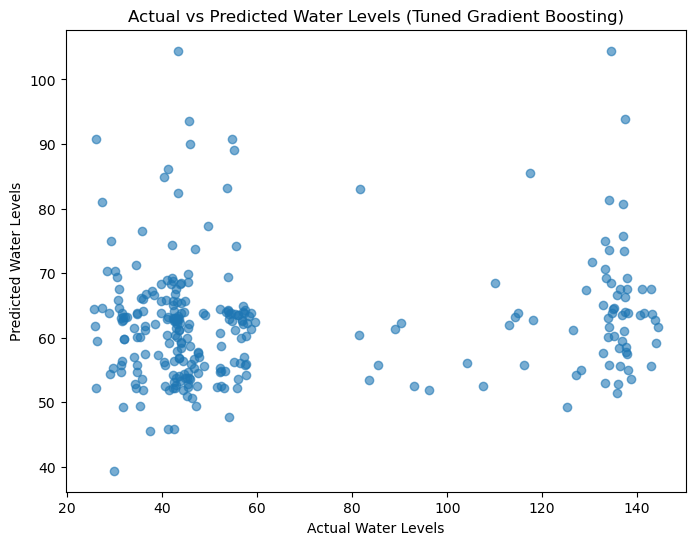

In [372]:
# Predict using the best Gradient Boosting model
y_pred_best_gboost = best_gboost.predict(X_test)

# Calculate the MSE and R^2 score
mse_best_gboost = mean_squared_error(y_test, y_pred_best_gboost)
r2_best_gboost = r2_score(y_test, y_pred_best_gboost)

# Print the results
print(f"Tuned Gradient Boosting – Mean Squared Error: {mse_best_gboost}")
print(f"Tuned Gradient Boosting – R² Score: {r2_best_gboost}")

# Plot Actual vs Predicted for the tuned model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_gboost, alpha=0.6)
plt.title('Actual vs Predicted Water Levels (Tuned Gradient Boosting)')
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.show()



In [130]:
df_main['tavg'] = df_main['tavg'].fillna(df_main['tavg'].median())
df_main['tmin'] = df_main['tmin'].fillna(df_main['tmin'].median())
df_main['tmax'] = df_main['tmax'].fillna(df_main['tmax'].median())
df_main['prcp'] = df_main['prcp'].fillna(df_main['prcp'].median())
df_main['wspd'] = df_main['wspd'].fillna(df_main['wspd'].median())
df_main


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,prcp,wdir,wspd,pres,Year_y,Month_y,Day_y,average_water_level,half_of_year,season
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.0,0.0,0.0,0.0,2014,1,8,50.77100,First Half,Winter
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.0,213.0,10.7,0.0,2014,1,9,47.21125,First Half,Winter
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.0,0.0,8.3,0.0,2014,1,10,46.14775,First Half,Winter
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.0,0.0,0.0,0.0,2014,1,12,43.08000,First Half,Winter
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.0,66.0,16.4,0.0,2014,2,8,50.64675,First Half,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2019-02-01,34.463,43.956,36.424,57.392,223.533,47.300,65.410,7.091,100.669,...,0.0,240.0,16.0,1010.1,2019,2,1,43.05875,First Half,Winter
1396,2019-02-02,30.051,57.874,51.693,53.646,401.352,84.711,89.206,9.971,128.098,...,0.0,240.0,29.0,1004.4,2019,2,2,48.31600,First Half,Winter
1397,2019-02-03,31.132,59.347,58.203,56.948,547.343,93.657,94.387,10.047,119.841,...,0.0,255.0,24.7,1010.2,2019,2,3,51.40750,First Half,Winter
1398,2019-02-04,35.407,58.590,63.044,65.100,564.146,108.697,98.046,9.939,111.721,...,0.0,279.0,24.1,1014.5,2019,2,4,55.53525,First Half,Winter


In [132]:


# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [10, 20, 30]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters found: {best_params}")


Best hyperparameters found: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [134]:
# Train the Gradient Boosting model with the best parameters
best_gbr_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

best_gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbr = best_gbr_model.predict(X_test)

# Step 3: Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Optimized Gradient Boosting - Mean Squared Error: {mse_gbr}")
print(f"Optimized Gradient Boosting - R² Score: {r2_gbr}")


Optimized Gradient Boosting - Mean Squared Error: 1453.4871179852664
Optimized Gradient Boosting - R² Score: 0.03157638682187136


In [136]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use the scaled data in the Gradient Boosting Regressor
best_gbr_model.fit(X_train_scaled, y_train)
y_pred_scaled_gbr = best_gbr_model.predict(X_test_scaled)

# Evaluate the scaled model
mse_scaled_gbr = mean_squared_error(y_test, y_pred_scaled_gbr)
r2_scaled_gbr = r2_score(y_test, y_pred_scaled_gbr)

print(f"Scaled Gradient Boosting - Mean Squared Error: {mse_scaled_gbr}")
print(f"Scaled Gradient Boosting - R² Score: {r2_scaled_gbr}")


Scaled Gradient Boosting - Mean Squared Error: 1458.1413950850542
Scaled Gradient Boosting - R² Score: 0.02847535359637121


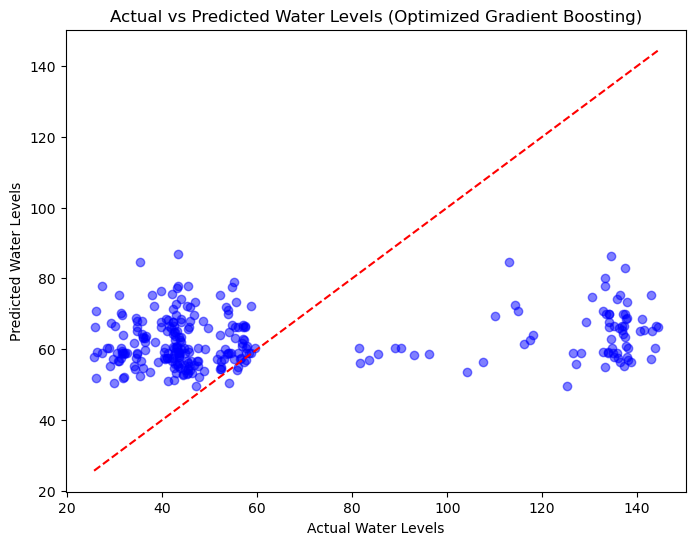

In [138]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color='blue')
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Optimized Gradient Boosting)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


Best hyperparameters found: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Gradient Boosting - Mean Squared Error: 1446.974843813587
Gradient Boosting - R² Score: 0.035915358942990805


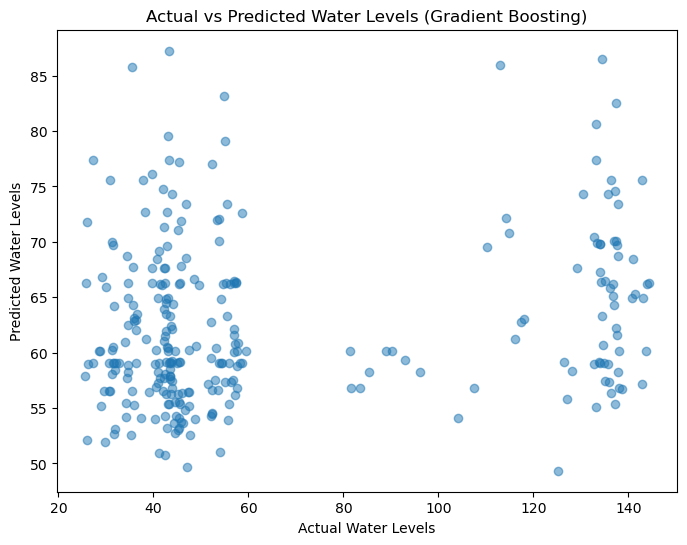

In [140]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Set up the GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Train the model on the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters found: {best_params}")

# Re-train the model with the best parameters
best_gbr_model = GradientBoostingRegressor(**best_params, random_state=42)
best_gbr_model.fit(X_train, y_train)

# Step 2: Predict on the test set and evaluate
y_pred_gbr = best_gbr_model.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting - R² Score: {r2_gbr}")

# Plot Actual vs Predicted for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Gradient Boosting)')
plt.show()


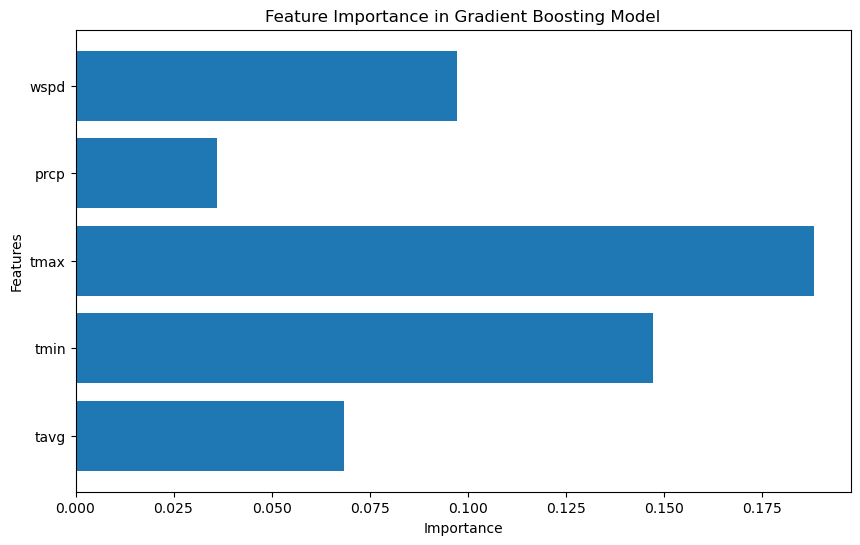

In [422]:
# Check feature importance in Gradient Boosting
importances = best_gbr_model.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()


In [142]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly.fit_transform(X)

print(f"Original features shape: {X.shape}")
print(f"Transformed features shape: {X_poly.shape}")


Original features shape: (1400, 6)
Transformed features shape: (1400, 27)


In [144]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}, R² Score: {r2_xgb}")


XGBoost MSE: 1809.0897064993974, R² Score: -0.20535309082062736


In [147]:
#Hyperparameter Tuning (Full Grid Search)
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

grid_xgb = GridSearchCV(XGBRegressor(), param_grid_xgb, scoring='neg_mean_squared_error', cv=3, n_jobs=2)
grid_xgb.fit(X_train, y_train)

best_params_xgb = grid_xgb.best_params_
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")



Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100}


In [149]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(gbr_model, X, y, scoring='neg_mean_squared_error', cv=5)

# Print the mean and standard deviation of cross-validation scores
print(f"Mean CV MSE: {-cv_scores.mean()}, Std CV MSE: {cv_scores.std()}")


Mean CV MSE: 2059.6492500210043, Std CV MSE: 1417.3792376687024


In [157]:
from sklearn.model_selection import cross_val_score

# Cross-validation with Gradient Boosting
cv_scores = cross_val_score(gbr_model, X, y, scoring='neg_mean_squared_error', cv=5)
print(f"Mean CV MSE: {-cv_scores.mean()}, Std CV MSE: {cv_scores.std()}")


Mean CV MSE: 2059.6492500210043, Std CV MSE: 1417.3792376687024


In [165]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")


y_test shape: (280,)
y_pred shape: (420,)


In [189]:
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

# Find columns that are in one set but not the other
print("Columns in training set but not in test set:", train_columns - test_columns)
print("Columns in test set but not in training set:", test_columns - train_columns)


Columns in training set but not in test set: set()
Columns in test set but not in training set: set()


In [195]:
# Step 1: Sicherstellen, dass die Features korrekt transformiert werden
# Annahme: Du hast bereits 'half_of_year' in X_train und X_test kodiert (z.B. mit pd.get_dummies)
# Jetzt, überprüfe und angleiche die Spalten

# Missing columns in X_test
missing_columns = set(X_train.columns) - set(X_test.columns)
if missing_columns:
    print("Missing columns in X_test:", missing_columns)
    for col in missing_columns:
        X_test[col] = 0  # Standardwert für fehlende Spalten setzen

# Extra columns in X_test (Spalten, die in X_test vorhanden, aber nicht in X_train sind)
extra_columns = set(X_test.columns) - set(X_train.columns)
if extra_columns:
    print("Extra columns in X_test:", extra_columns)
    X_test.drop(columns=extra_columns, inplace=True)

# Step 2: Spaltenreihenfolge angleichen
X_test = X_test[X_train.columns]

# Step 3: Jetzt kannst du die Vorhersage mit dem Modell machen
try:
    y_pred = model.predict(X_test)
except Exception as e:
    print(f"Fehler bei der Vorhersage: {str(e)}")

# Step 4: Überprüfen, ob die Shapes übereinstimmen
if y_test.shape != y_pred.shape:
    print(f"Shape mismatch: y_test shape is {y_test.shape}, y_pred shape is {y_pred.shape}")
else:
    # Berechne Residuen und plotte sie, falls die Shapes übereinstimmen
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Actual Water Levels')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()


Fehler bei der Vorhersage: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- half_of_year_Second Half
- prcp
- tmax
- tmin
Feature names seen at fit time, yet now missing:
- pres
- pres pres
- pres^2
- tavg pres
- tavg tavg
- ...

Shape mismatch: y_test shape is (280,), y_pred shape is (420,)


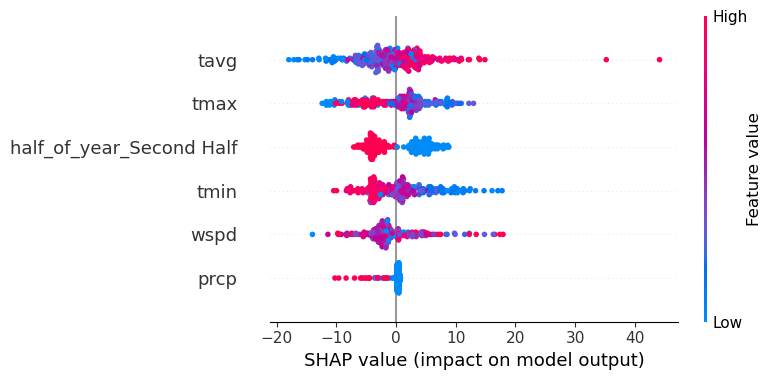

In [161]:
import shap

# SHAP summary plot for Gradient Boosting model
explainer = shap.TreeExplainer(gbr_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
# Starts with a baseline prediction = y_pred = mean(target_column)